### Dans ce notebook je vais réaliser une analyse exploratoire de données univariée, bivariée et multivariée (ACP et clustering)

#### Préparation de l'environnement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from matplotlib.collections import LineCollection

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

Unnamed: 0                       product_name  \
0           0                     Lion Peanut x2   
1           1                     Pack de 2 Twix   
2           2                              Flute   
3           3                  lentilles vertes    
4           4  Biscuits sablés fourrage au cacao   

                                           image_url nutrition_grade_fr  \
0  http://fr.openfoodfacts.org/images/products/00...                  E   
1  http://fr.openfoodfacts.org/images/products/00...                  C   
2  http://fr.openfoodfacts.org/images/products/00...                  B   
3  http://fr.openfoodfacts.org/images/products/00...                  B   
4  http://fr.openfoodfacts.org/images/products/00...                  D   

   nutrition-score-fr_100g  ingredients_from_palm_oil_n  additives_n  \
0                     22.0                     0.000000     1.000000   
1                      7.0                     0.137778     2.300291   
2                      2.0                     0.000000     0.000000   
3                      2.0                     0.000000     0.000000   
4                     16.0                     0.000000     3.000000   

   energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
0       1883.0     20.00               12.50               70.00       57.500   
1       1481.0      4.17                3.78               77.08       25.220   
2       1278.0      4.50                0.60               52.00        4.625   
3       1493.0      3.00                0.60               64.00        3.500   
4       1942.0     21.00                9.80               62.00       31.000   

   fiber_100g  proteins_100g  salt_100g  
0        2.50           2.50    0.09652  
1        6.20           6.25    0.44008  
2        4.40           9.40    1.20000  
3        4.09           9.40    0.50800  
4        2.60           6.10    0.58000

In [4]:
data = data.iloc[:,1:]

#### Analyse univariée

In [5]:
data.describe()

nutrition-score-fr_100g  ingredients_from_palm_oil_n   additives_n  \
count             62282.000000                 62282.000000  62282.000000   
mean                  7.591776                     0.053497      1.639273   
std                   8.470689                     0.222911      2.373561   
min                 -44.000000                    -0.185984     -6.482742   
25%                   1.000000                     0.000000      0.000000   
50%                   6.000000                     0.000000      1.000000   
75%                  14.000000                     0.000000      2.000000   
max                  43.000000                     2.000000     31.000000   

        energy_100g      fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  62282.000000  62282.000000        62282.000000        62282.000000   
mean    1025.720234     11.915673            4.743343           25.582021   
std      771.751718     16.341082            7.584110           26.464752   
min      -33.898468      0.000000            0.000000            0.000000   
25%      310.000000      0.500000            0.100000            3.800000   
50%      955.000000      5.500000            1.500000           12.800000   
75%     1544.000000     17.500000            6.000000           51.000000   
max     4000.000000    100.000000          100.000000          100.000000   

        sugars_100g    fiber_100g  proteins_100g     salt_100g  
count  62282.000000  62282.000000   62282.000000  62282.000000  
mean      12.214576      2.046886       6.981510      1.015057  
std       17.930016      3.127428       7.198663      3.834802  
min        0.000000      0.000000       0.000000      0.000000  
25%        1.000000      0.100000       1.000000      0.033000  
50%        3.600000      1.100000       5.600000      0.508000  
75%       13.700000      2.600000       9.500000      1.140000  
max      100.000000     94.800000      86.000000    100.000000

C:\Users\linae\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\linae\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\linae\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\linae\anaconda3\lib\si

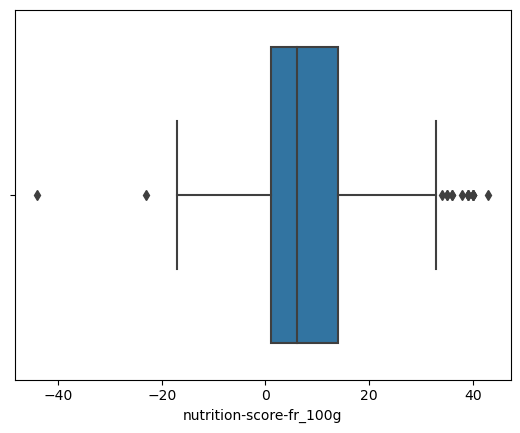

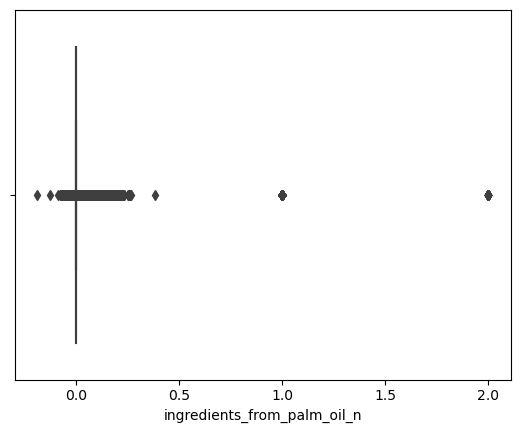

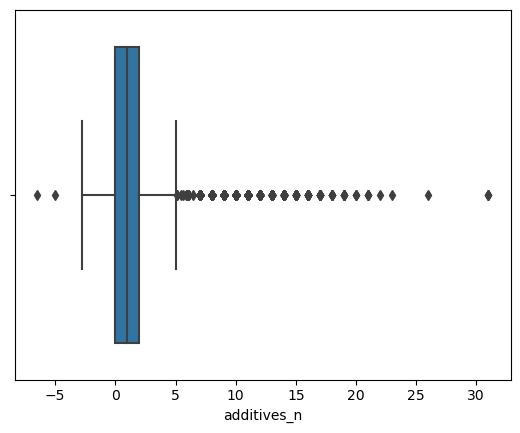

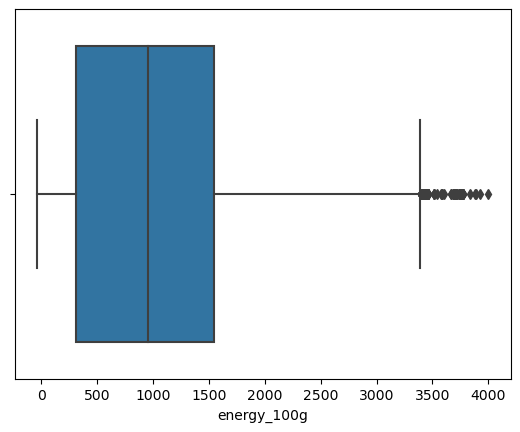

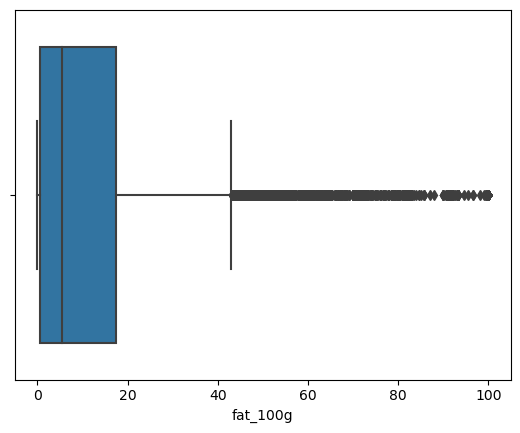

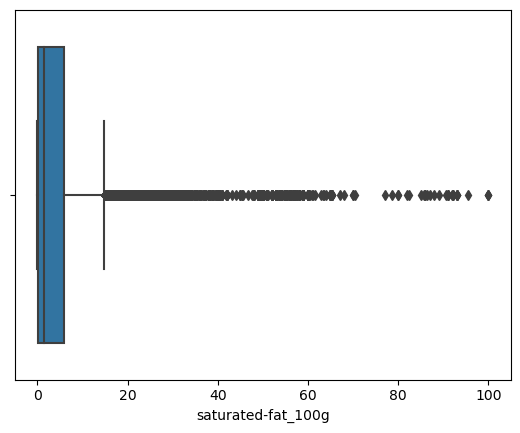

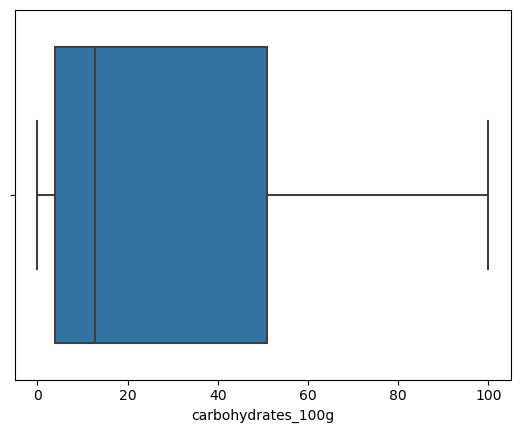

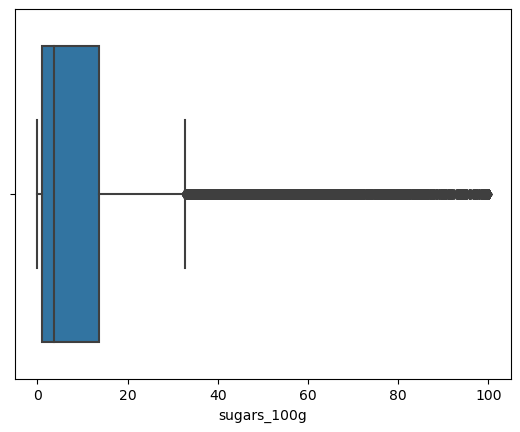

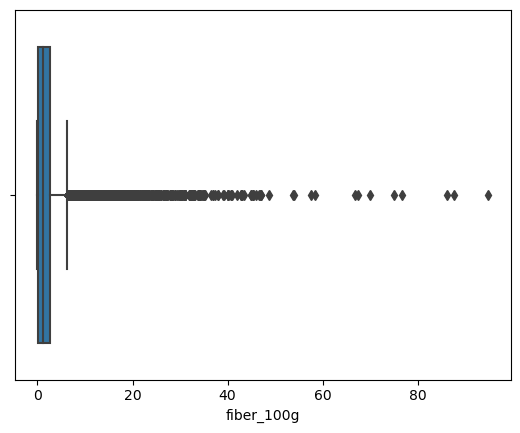

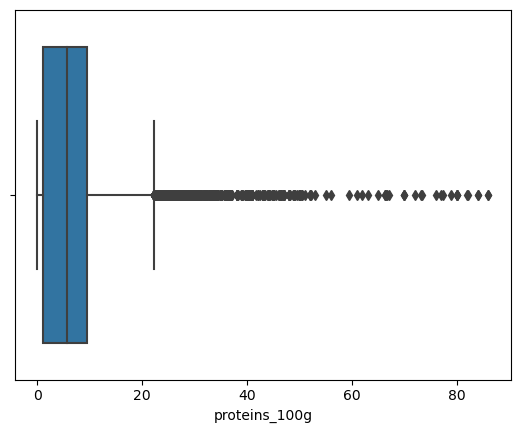

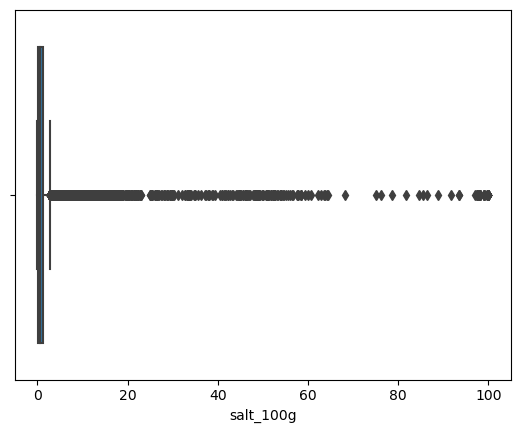

In [6]:
for col in data.iloc[:,3:].columns :
    plt.figure()
    sns.boxplot(data[col])

#### Analyse bivariée

<AxesSubplot:>

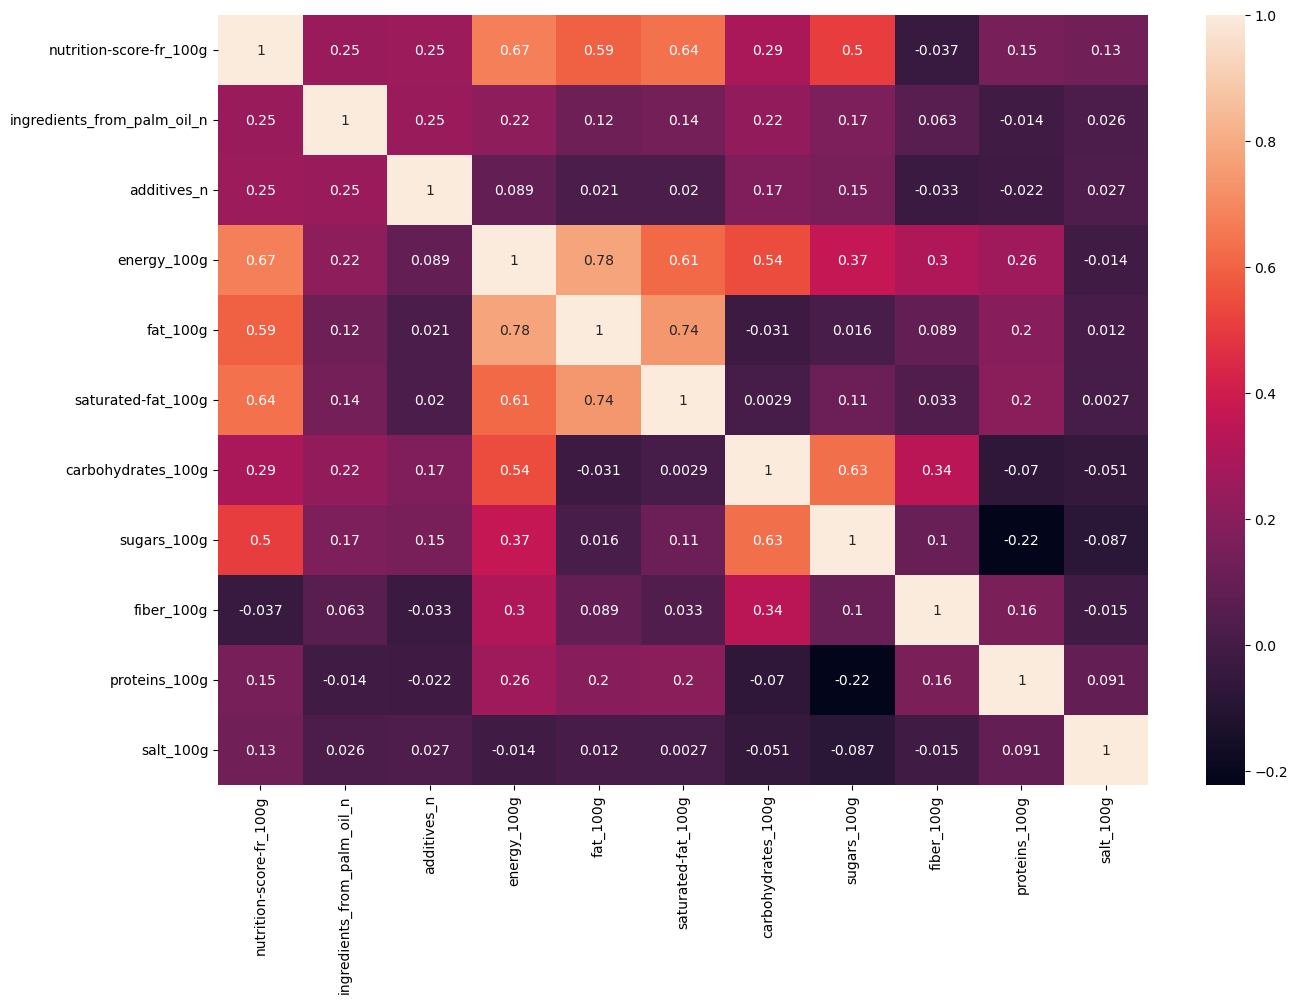

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='energy_100g', ylabel='fat_100g'>

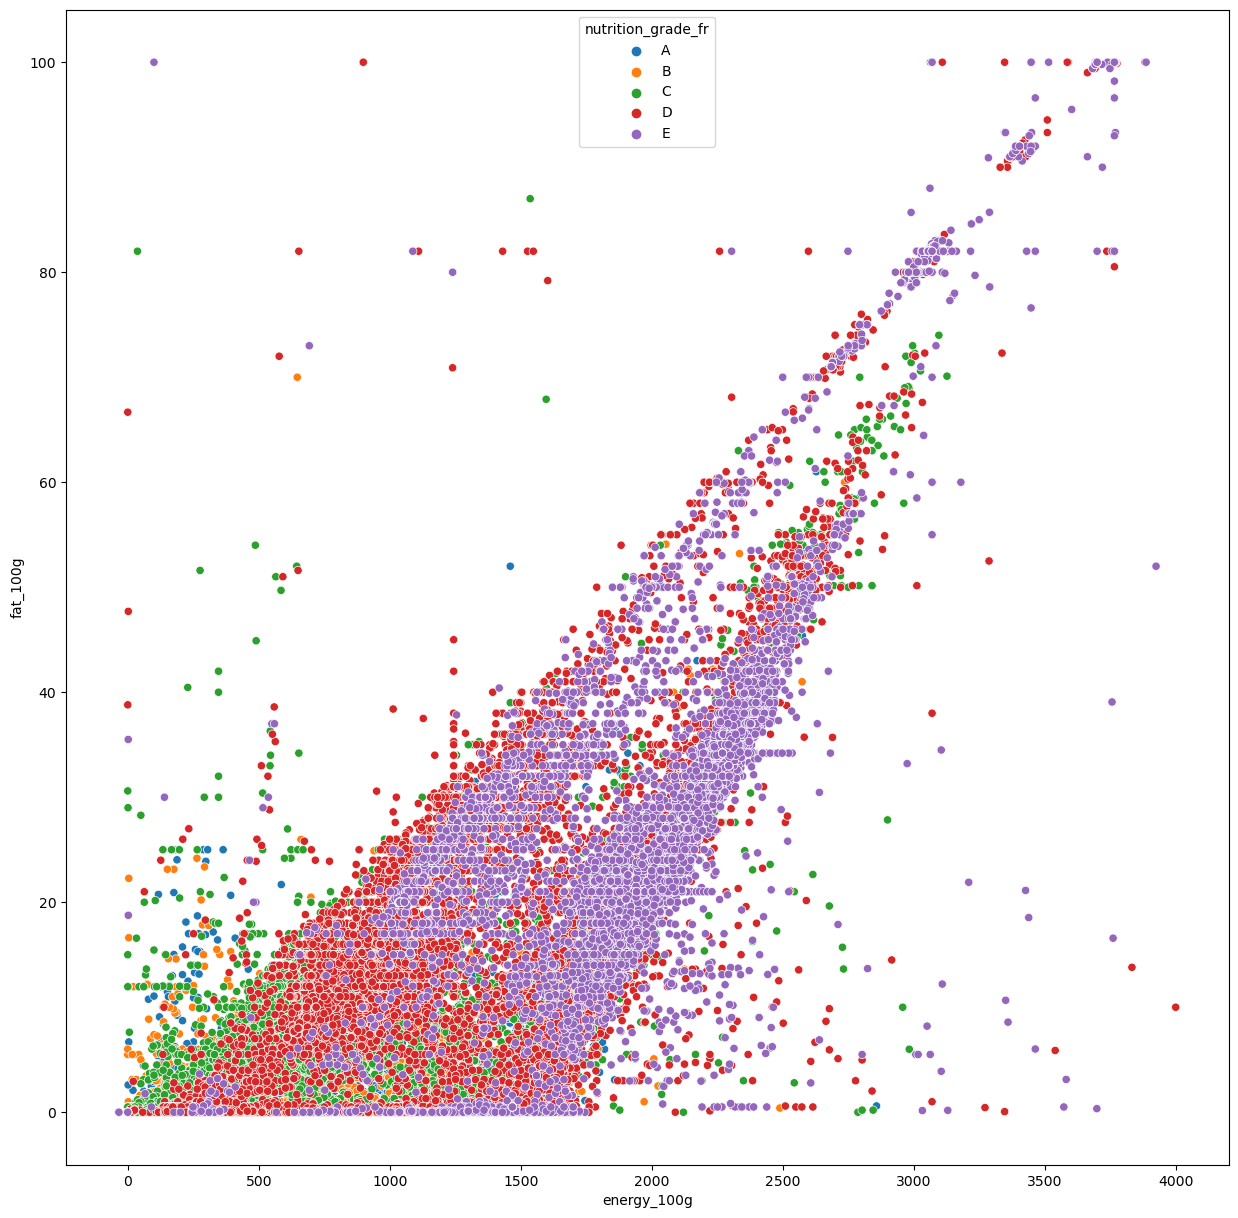

In [8]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=data.sort_values(by=['nutrition_grade_fr']),x='energy_100g',y='fat_100g',hue='nutrition_grade_fr')

<AxesSubplot:xlabel='proteins_100g', ylabel='sugars_100g'>

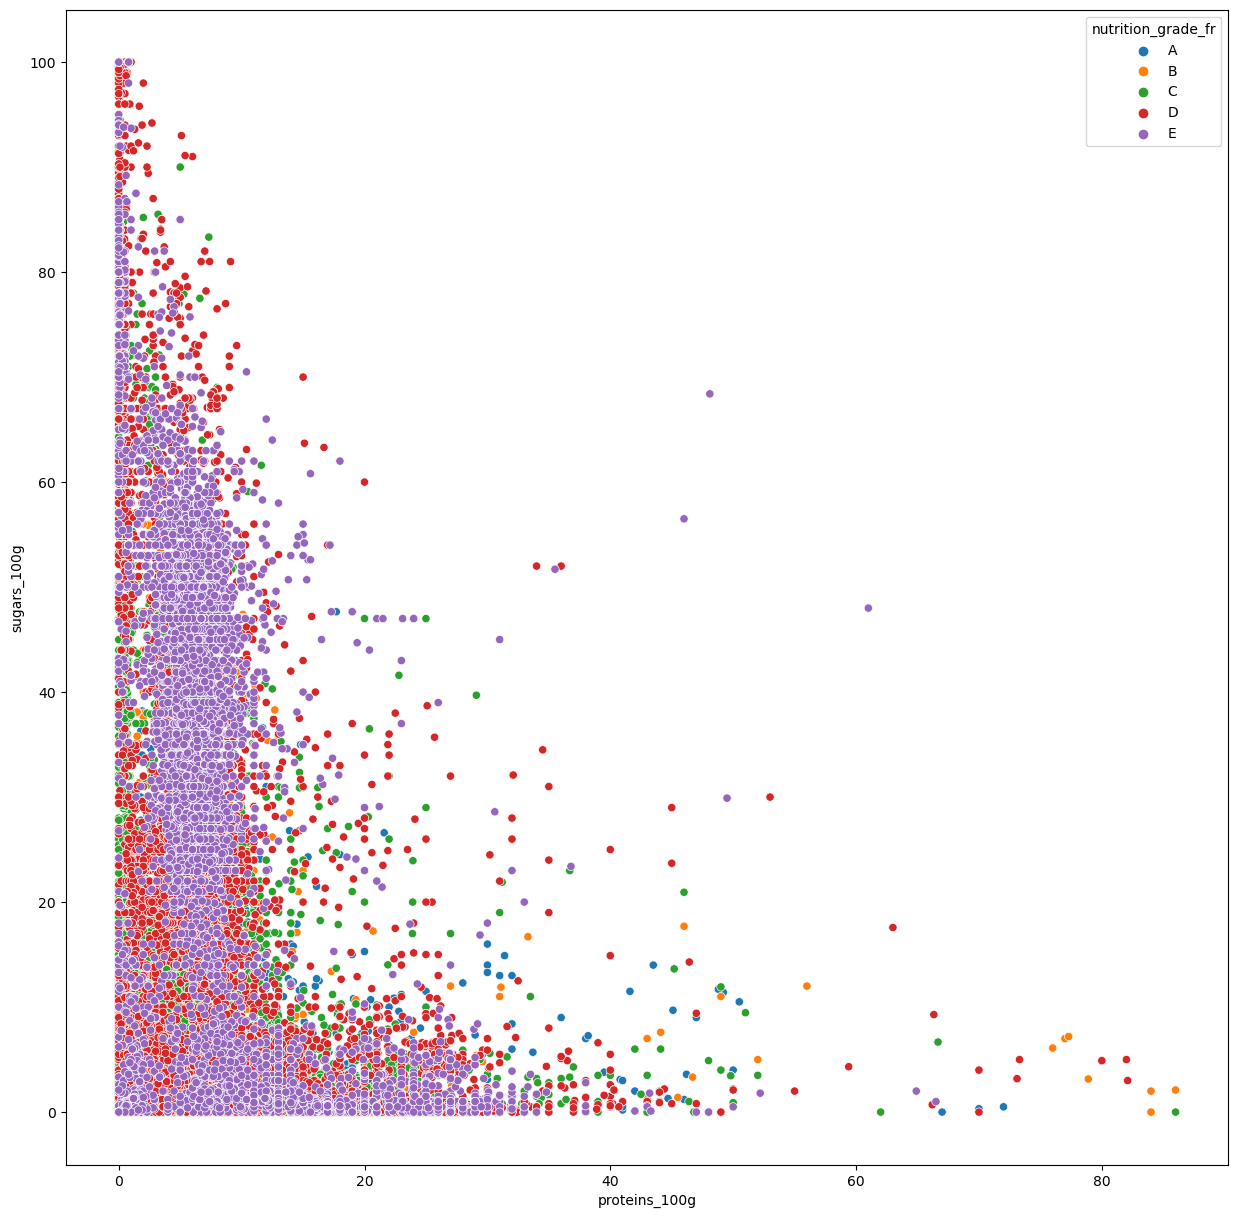

In [9]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=data.sort_values(by=['nutrition_grade_fr']),x='proteins_100g',y='sugars_100g',hue='nutrition_grade_fr')


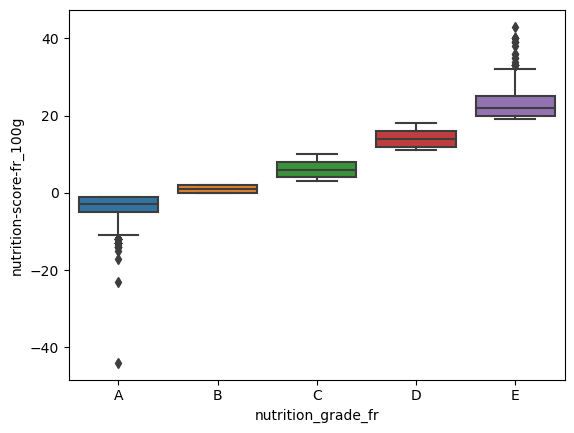

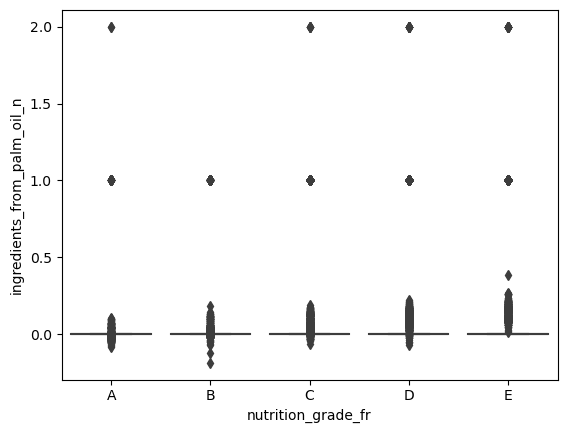

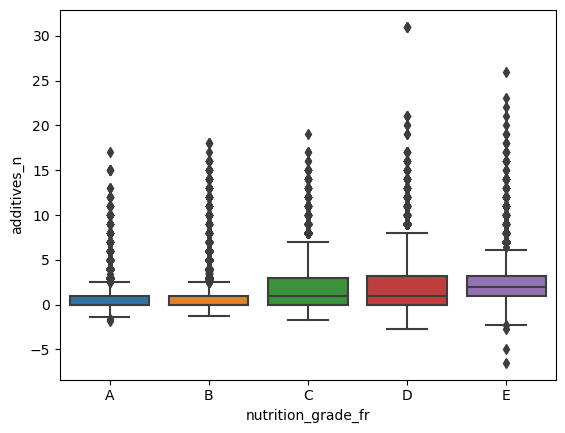

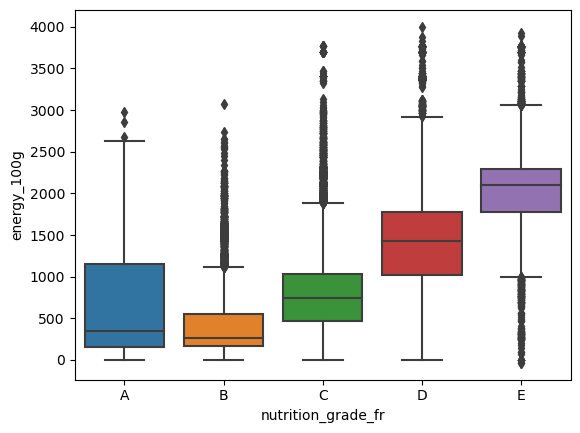

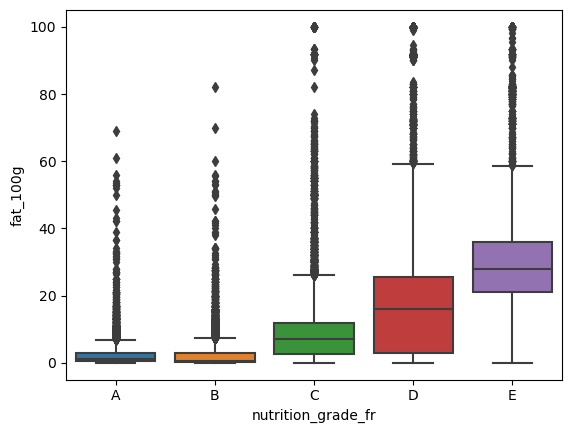

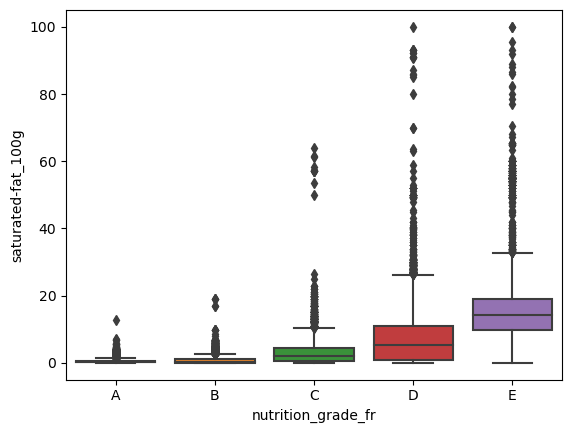

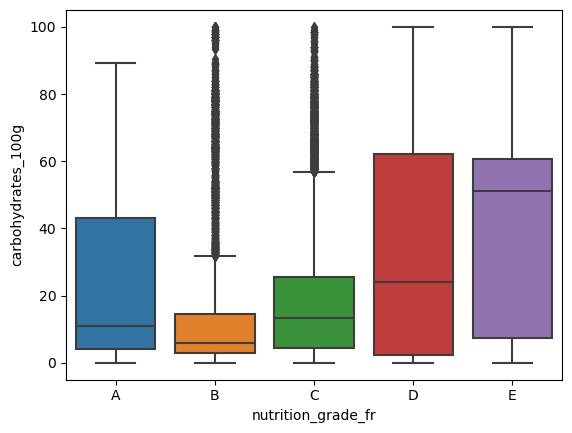

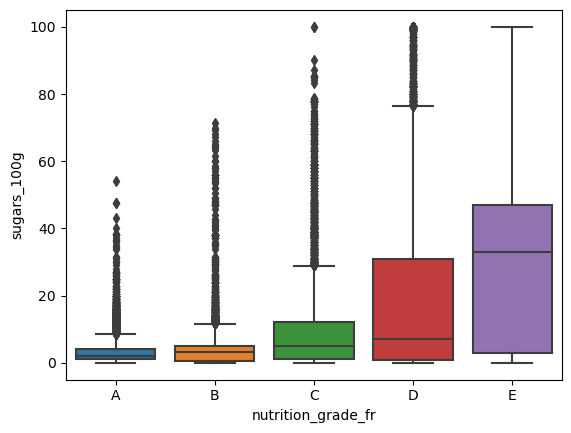

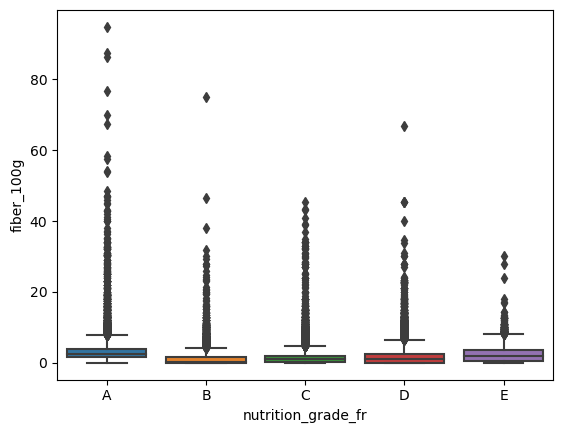

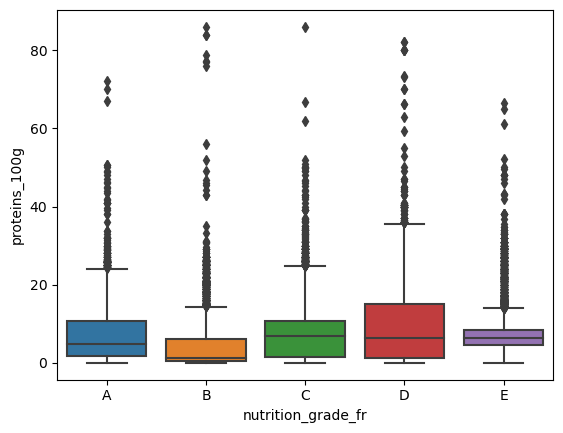

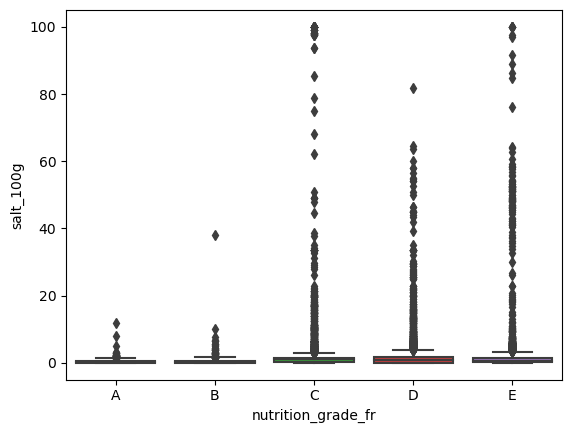

In [10]:
for col in data.iloc[:,3:].columns :
    plt.figure()
    sns.boxplot(data=data.sort_values(by=['nutrition_grade_fr']),x='nutrition_grade_fr',y=col)

C:\Users\linae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\linae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\linae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\linae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\linae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\linae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\linae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\linae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\linae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

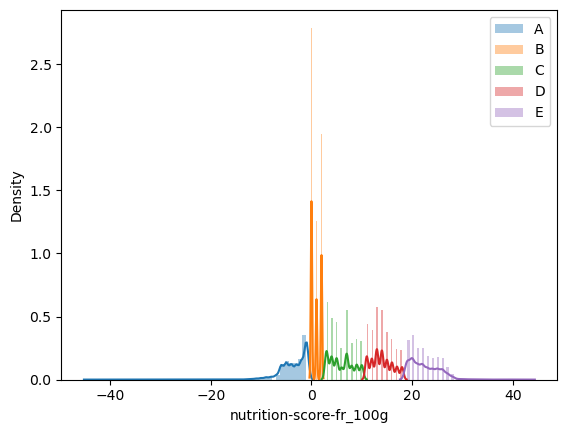

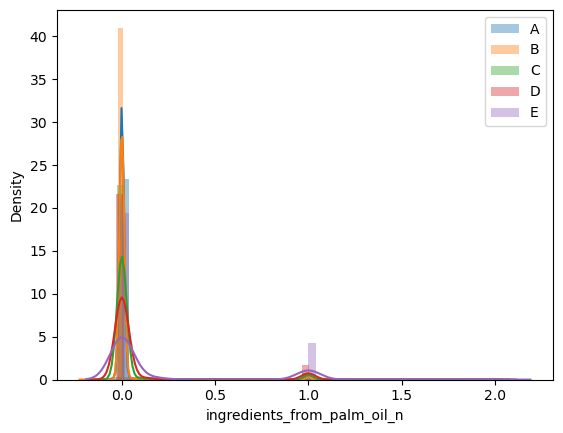

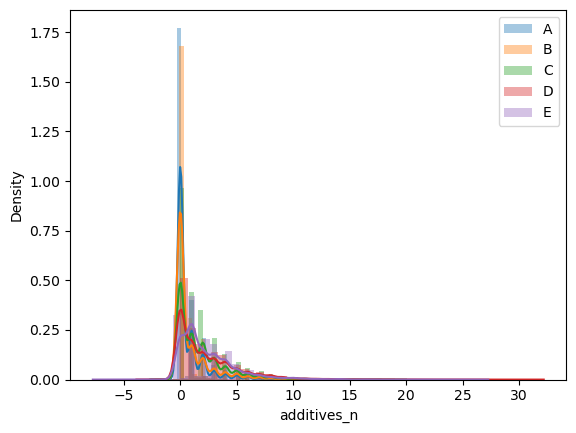

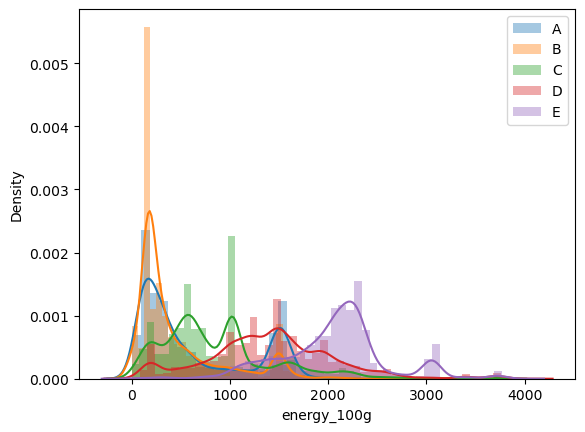

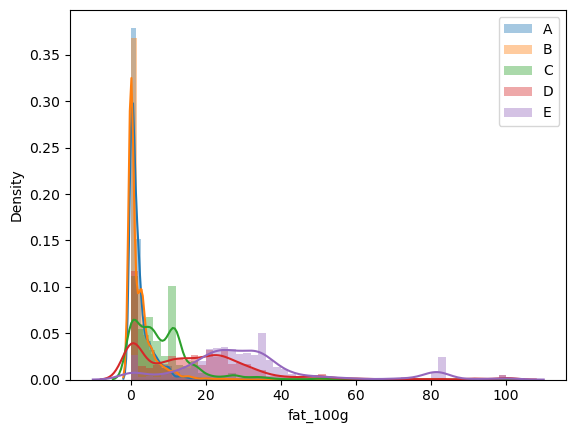

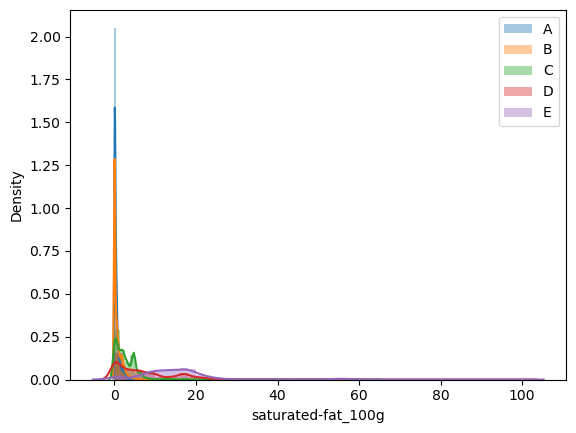

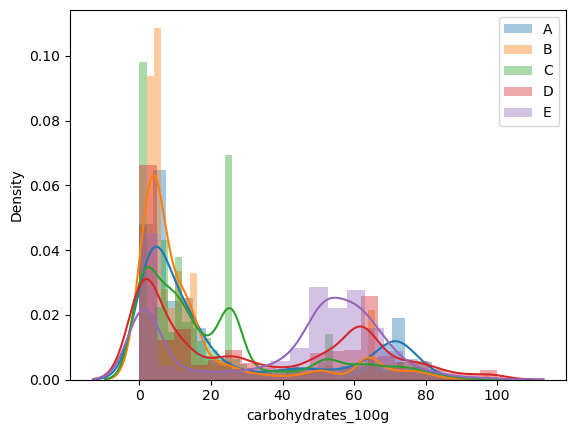

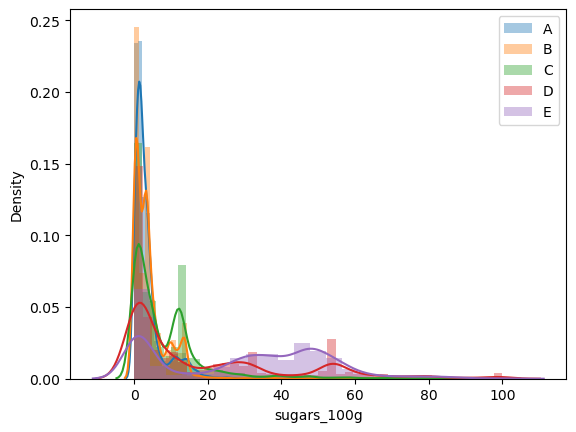

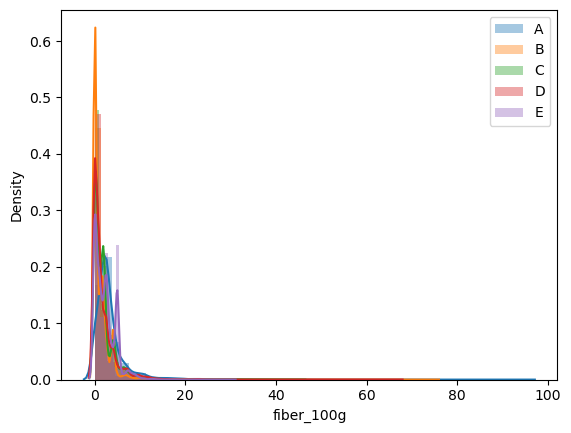

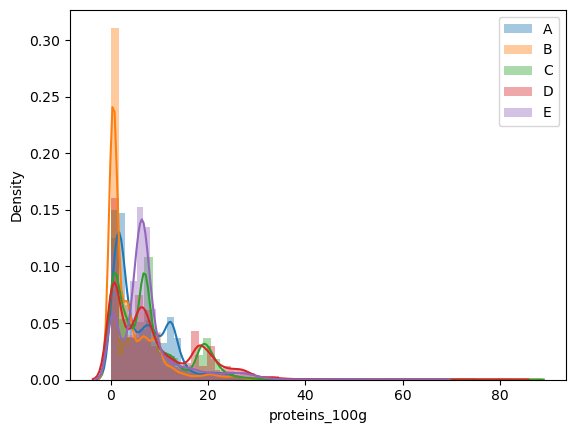

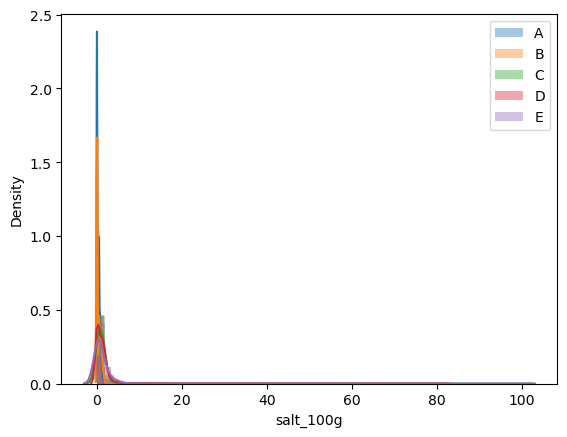

In [11]:
for col in data.iloc[:,3:].columns :
    plt.figure()
    for grade in ['A','B','C','D','E'] :
        sns.distplot(data.loc[data['nutrition_grade_fr']==grade][col],label=grade)
    plt.legend()

In [12]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

X = "nutrition_grade_fr" # qualitative
    
for col in data.iloc[:,3:].columns :
    print('le rapport de corrélation entre la variable '+col+' et le nutriscore est de '+str(eta_squared(data[X],data[col])))


le rapport de corrélation entre la variable nutrition-score-fr_100g et le nutriscore est de 0.9358337552234363
le rapport de corrélation entre la variable ingredients_from_palm_oil_n et le nutriscore est de 0.06128603050605147
le rapport de corrélation entre la variable additives_n et le nutriscore est de 0.06504753661221761
le rapport de corrélation entre la variable energy_100g et le nutriscore est de 0.46475838040740775
le rapport de corrélation entre la variable fat_100g et le nutriscore est de 0.3580108225248737
le rapport de corrélation entre la variable saturated-fat_100g et le nutriscore est de 0.41961709721334256
le rapport de corrélation entre la variable carbohydrates_100g et le nutriscore est de 0.09562782613792647
le rapport de corrélation entre la variable sugars_100g et le nutriscore est de 0.2434625917232542
le rapport de corrélation entre la variable fiber_100g et le nutriscore est de 0.05145322585185544
le rapport de corrélation entre la variable proteins_100g et le n

#### Analyse multivariée : ACP et clustering

In [13]:
X = data.iloc[:,3:].values
names = data.index
features = data.iloc[:,3:].columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8    9    10
mean  0.0 -0.0 -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

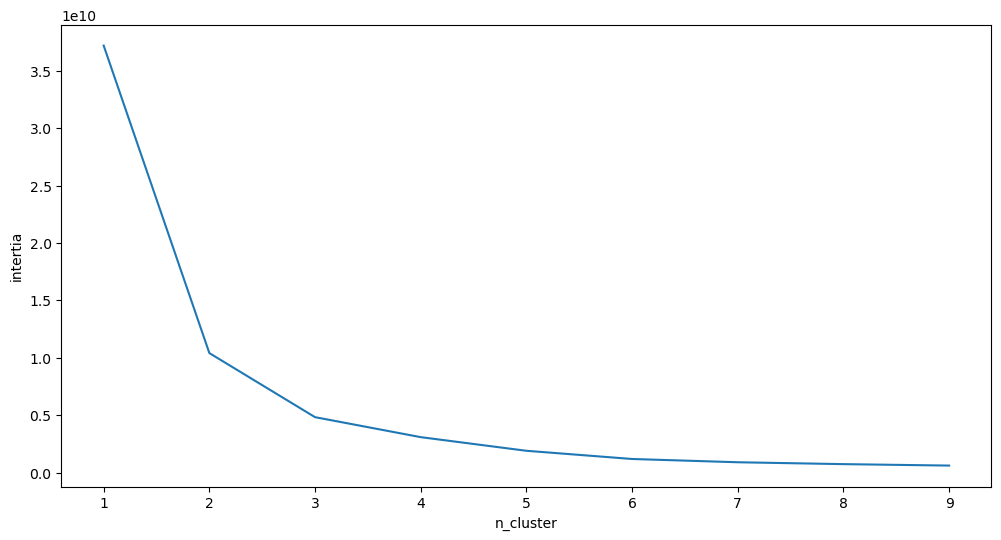

In [14]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)
    
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [15]:
# On instancie notre Kmeans avec 3 clusters : 
kmeans = KMeans(n_clusters=3)

# On l'entraine : 
kmeans.fit(X)

# On peut stocker nos clusters dans une variable labels : 
labels = kmeans.labels_

# On peut stocker nos centroids dans une variable : 
centroids = kmeans.cluster_centers_
centroids

array([[2.28558658e+00, 1.14523917e-02, 1.32130449e+00, 3.44459411e+02,
        2.94338300e+00, 1.04608330e+00, 8.90853331e+00, 5.26144913e+00,
        1.08221290e+00, 4.46126453e+00, 9.48158219e-01],
       [1.80666490e+01, 1.68928851e-01, 1.99867911e+00, 2.25992953e+03,
        3.57471977e+01, 1.33770445e+01, 4.39106345e+01, 2.31889861e+01,
        3.63773163e+00, 7.47342313e+00, 7.91760661e-01],
       [9.21651796e+00, 4.95379490e-02, 1.87588045e+00, 1.29175335e+03,
        1.14868982e+01, 5.18255669e+00, 3.82578504e+01, 1.57717484e+01,
        2.50497816e+00, 1.00800696e+01, 1.21997620e+00]])

In [16]:
data.insert(loc = 2,
          column = 'cluster_data',
          value = pd.DataFrame(labels))

In [17]:
data['cluster_data'].value_counts()

0    29090
2    21855
1    11337
Name: cluster_data, dtype: int64

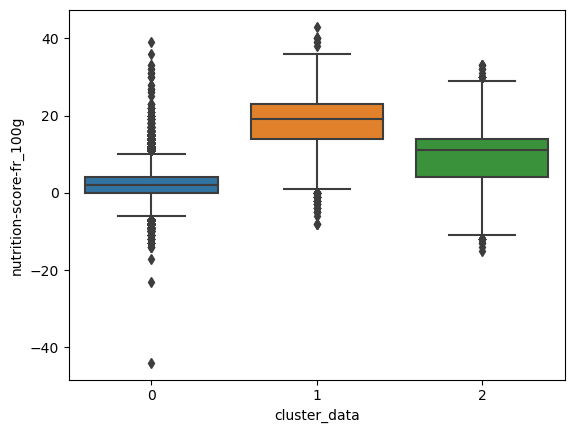

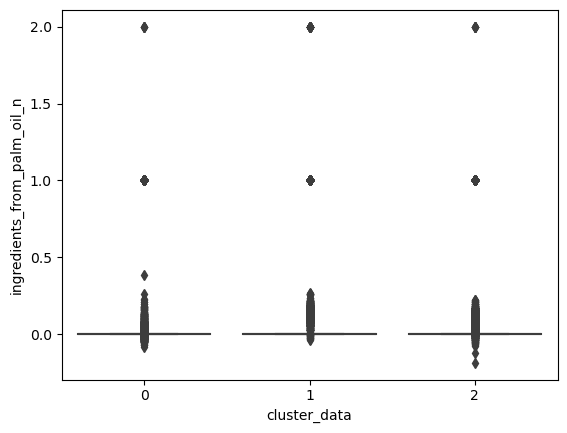

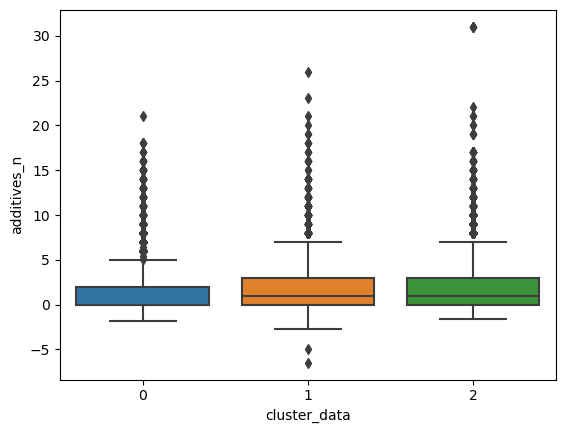

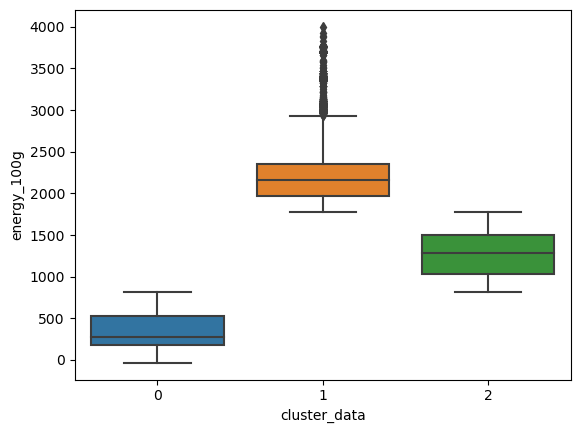

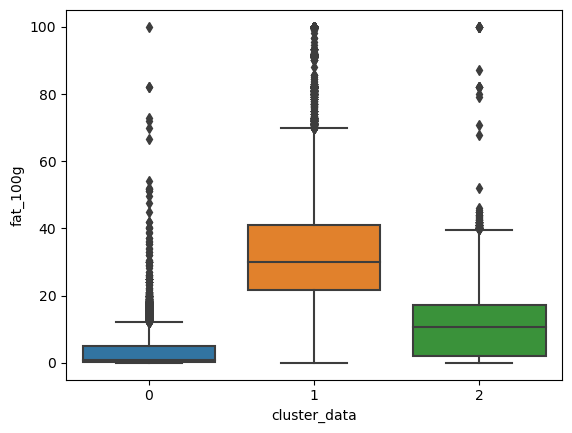

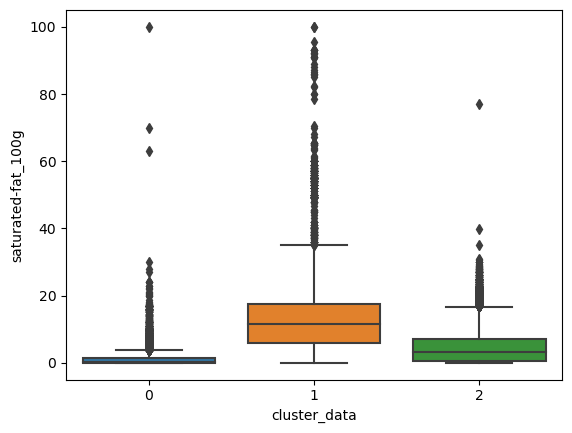

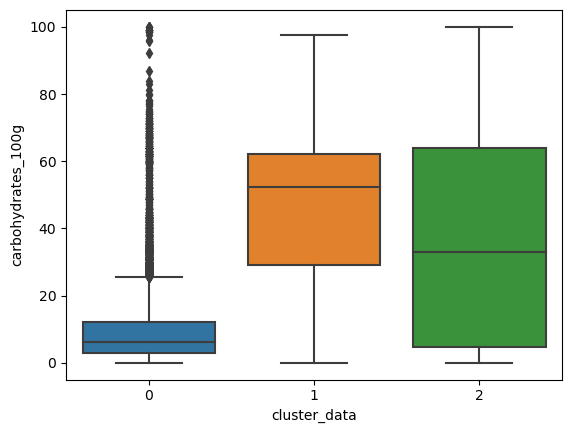

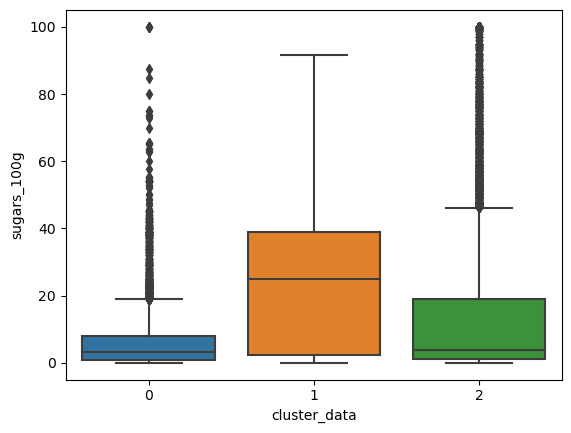

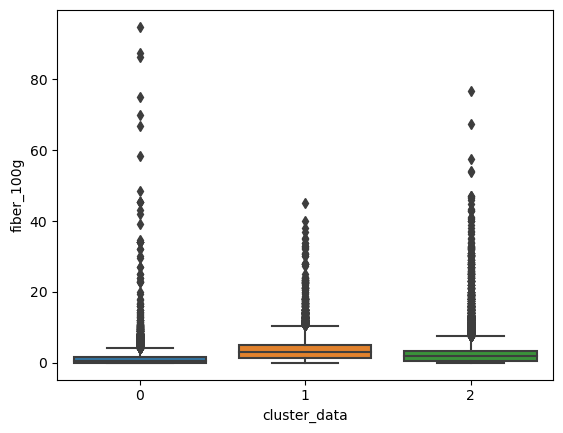

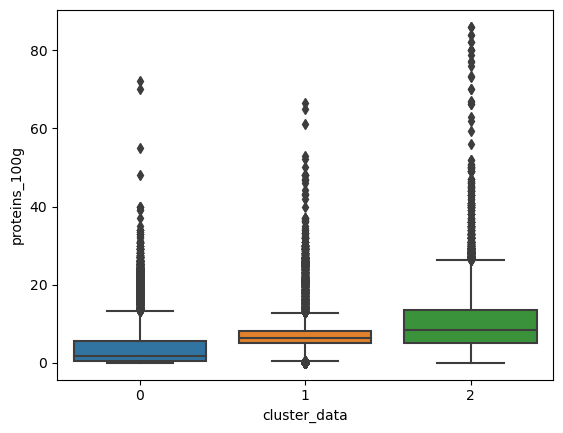

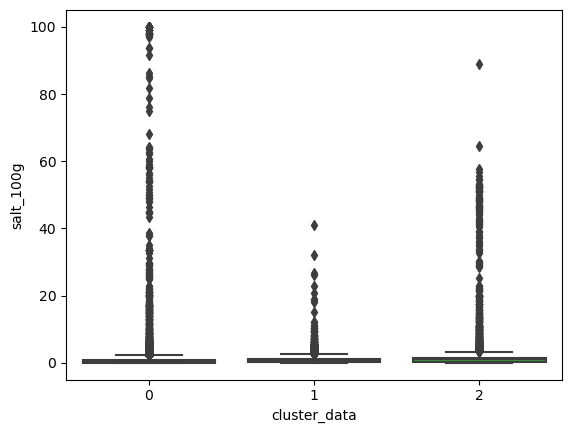

In [18]:
for col in data.iloc[:,4:].columns :
    plt.figure()
    sns.boxplot(data=data,x='cluster_data',y=col)

In [19]:
n_components=4

In [20]:
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=4)

In [21]:
pca

PCA(n_components=4)

In [22]:
pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
scree_cum

array([32., 49., 60., 70.])

In [23]:
scree

array([31.66, 16.96, 11.65, 10.12])

In [24]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4]

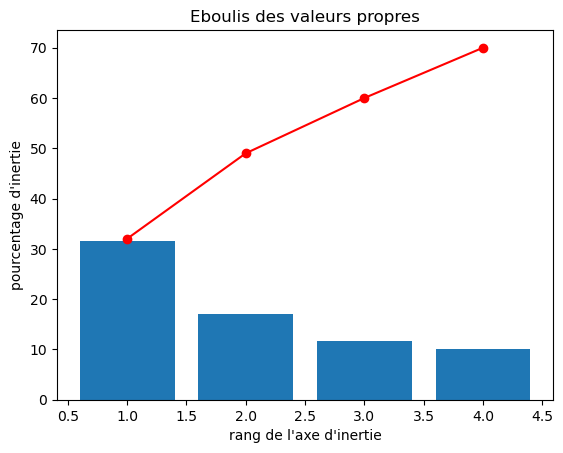

In [25]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [26]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6   \
0  0.456210  0.187547  0.121350  0.496025  0.405420  0.396489  0.265548   
1  0.026042 -0.183936 -0.212916  0.031352  0.373572  0.332426 -0.525592   
2 -0.263455 -0.246282 -0.417180  0.188727 -0.018479 -0.099031  0.237756   
3 -0.019599  0.358620  0.405543 -0.044171 -0.146036 -0.171939  0.038489   

         7         8         9         10  
0  0.268533  0.132298  0.118383  0.014829  
1 -0.493171 -0.150750  0.336776  0.116197  
2 -0.074262  0.674916  0.335788 -0.140796  
3 -0.218960  0.234821  0.424580  0.607345

In [27]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

nutrition-score-fr_100g  ingredients_from_palm_oil_n  additives_n  \
F1                     0.46                         0.19         0.12   
F2                     0.03                        -0.18        -0.21   
F3                    -0.26                        -0.25        -0.42   
F4                    -0.02                         0.36         0.41   

    energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
F1         0.50      0.41                0.40                0.27   
F2         0.03      0.37                0.33               -0.53   
F3         0.19     -0.02               -0.10                0.24   
F4        -0.04     -0.15               -0.17                0.04   

    sugars_100g  fiber_100g  proteins_100g  salt_100g  
F1         0.27        0.13           0.12       0.01  
F2        -0.49       -0.15           0.34       0.12  
F3        -0.07        0.67           0.34      -0.14  
F4        -0.22        0.23           0.42       0.61

<AxesSubplot:>

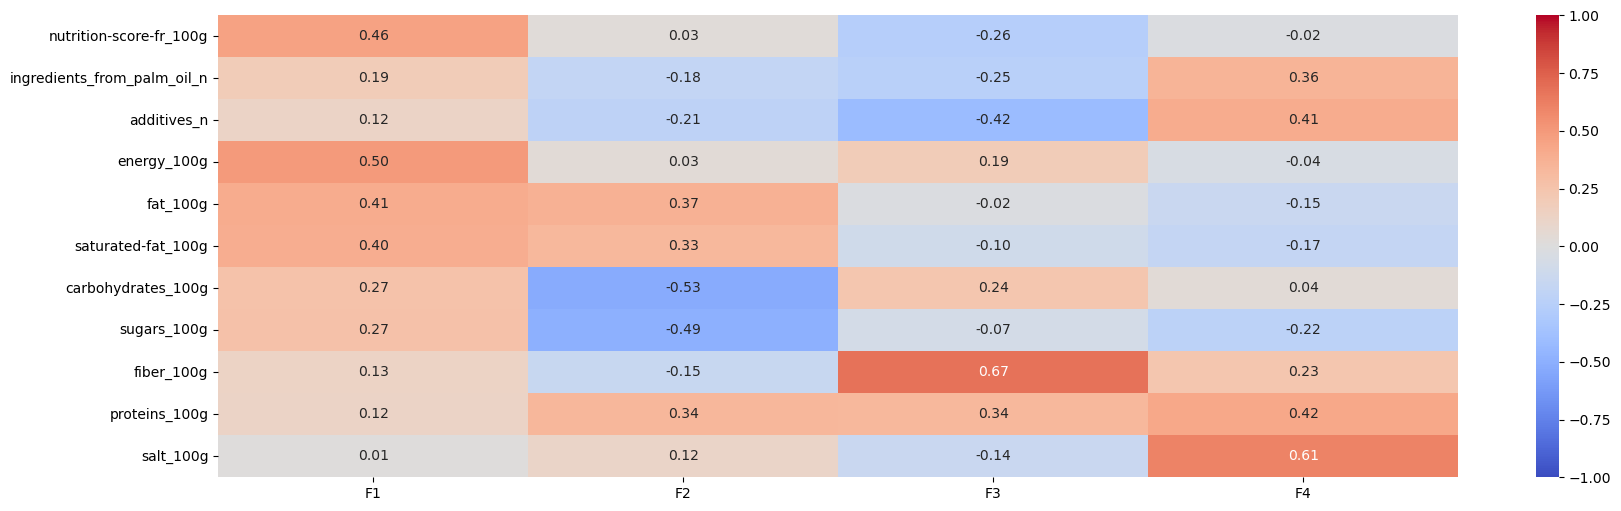

In [28]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

caractérisation des axes d'inertie
- F1 = énergie apportée par le gras et le sucre, contribuant à la hausse du nutriscore (est ce une sucrerie)
- F2 = caractéristiques des produits naturels d'origine animale et/ou 'salés' (protéine, calcium, gras, absence de sucre)
- F3 = à quel point le produit est naturel (bcp fibre et pas d'additifs, bon gras et glucide, énergie mais nutrioscore bas)
- F4 = à quel point produit est transformé (haute teneur en additifs, huile palme, sel)

In [29]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [30]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



In [31]:
X_proj = pca.transform(X_scaled)
data_proj = pd.DataFrame(X_proj, columns = ["sucrerie ?", "animal ?", "naturel ?", "transformé ?"])

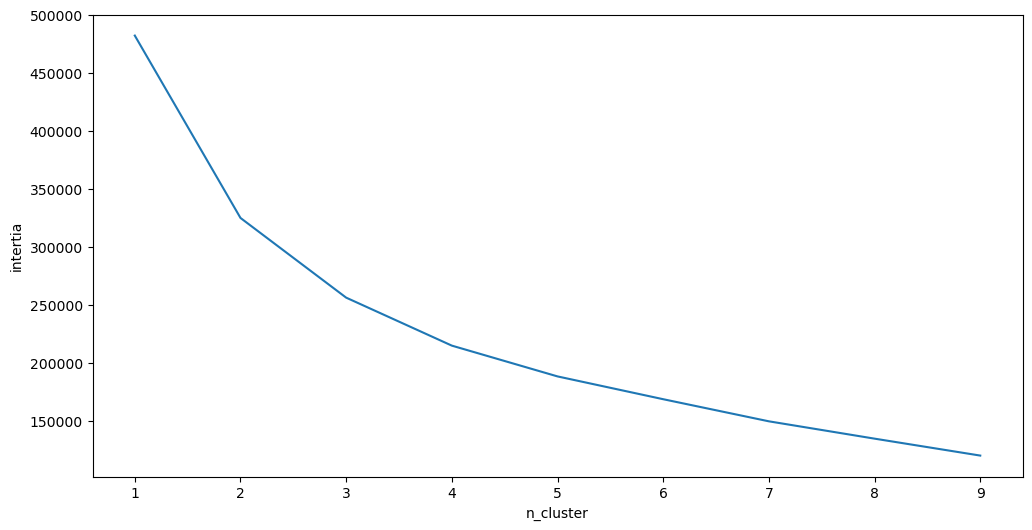

In [32]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X_proj)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)
    
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [33]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_proj)
labels = kmeans.labels_
data_proj.insert(loc = 0,
          column = 'cluster_proj',
          value = pd.DataFrame(labels))



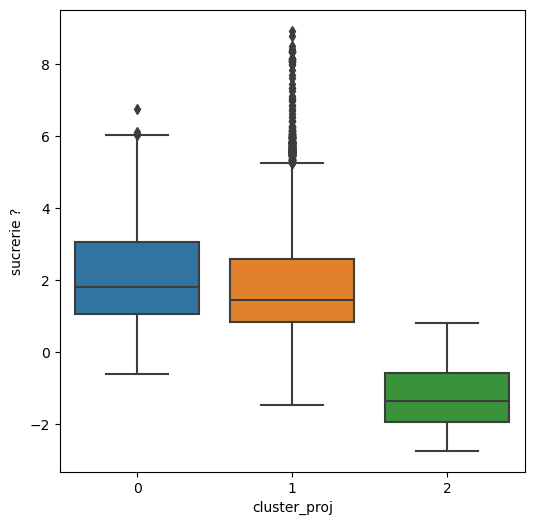

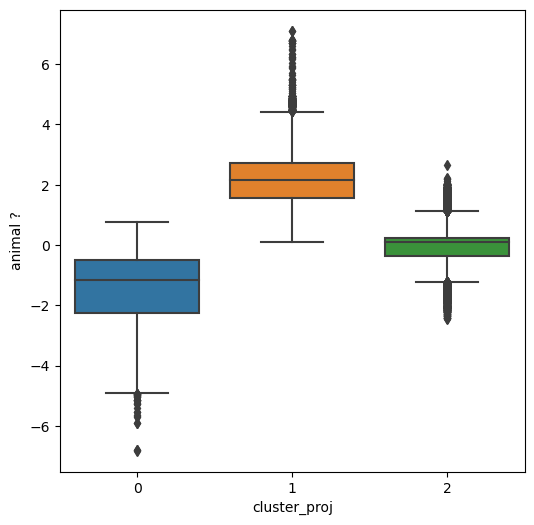

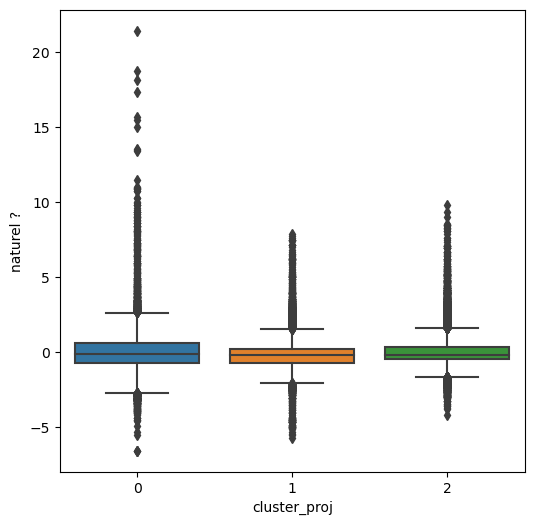

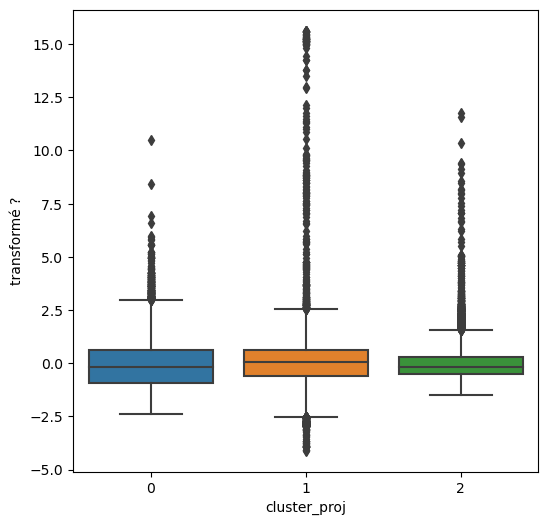

In [34]:
for col in data_proj.iloc[:,1:].columns :
    plt.figure(figsize=(6,6))
    sns.boxplot(data=data_proj,x='cluster_proj',y=col)

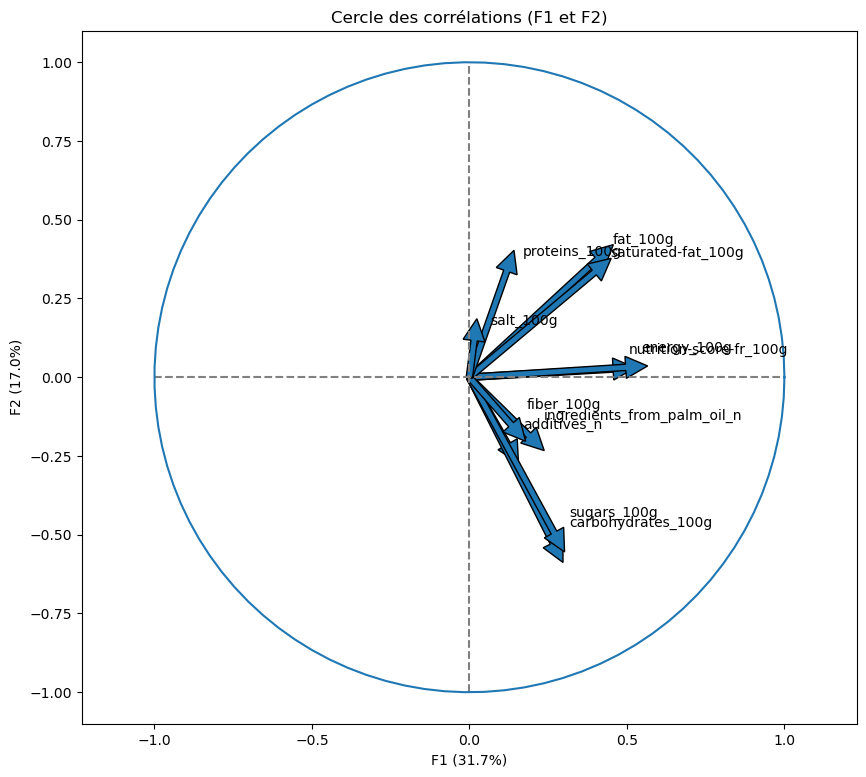

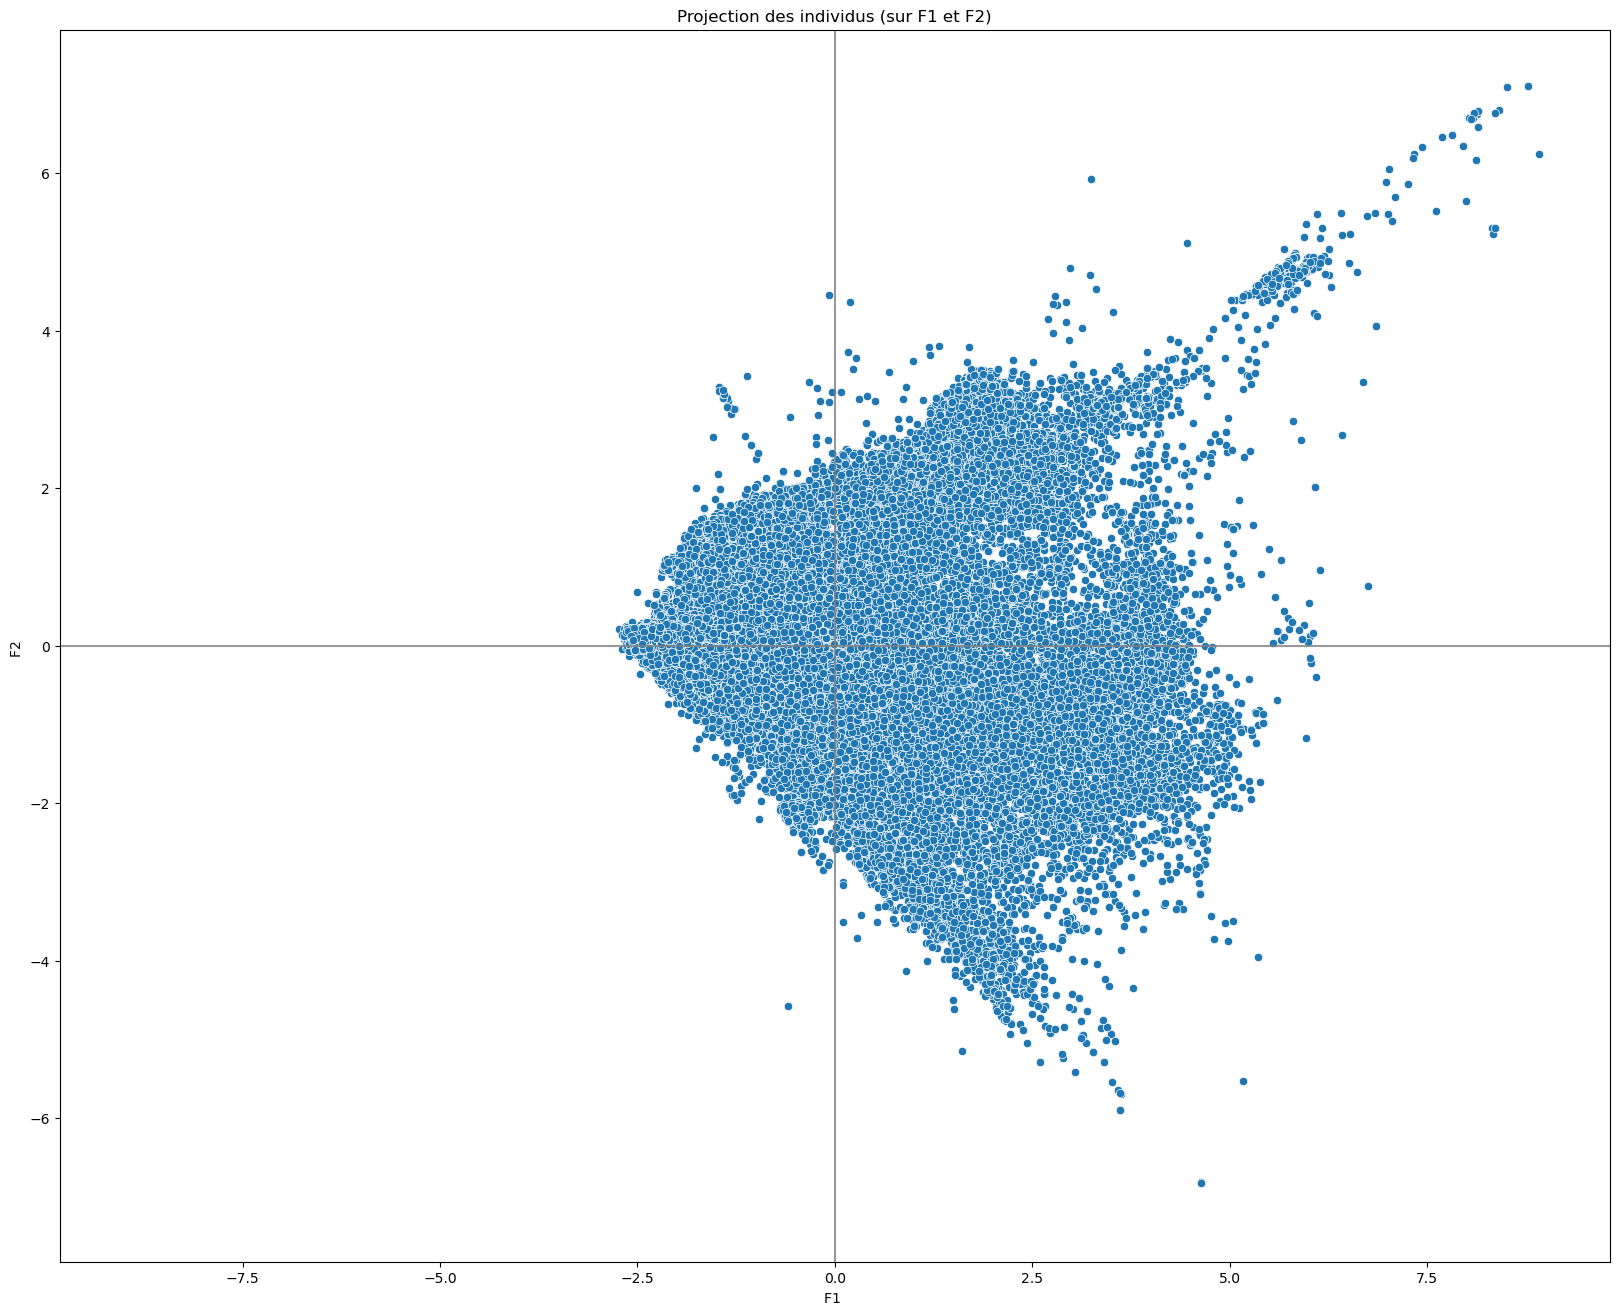

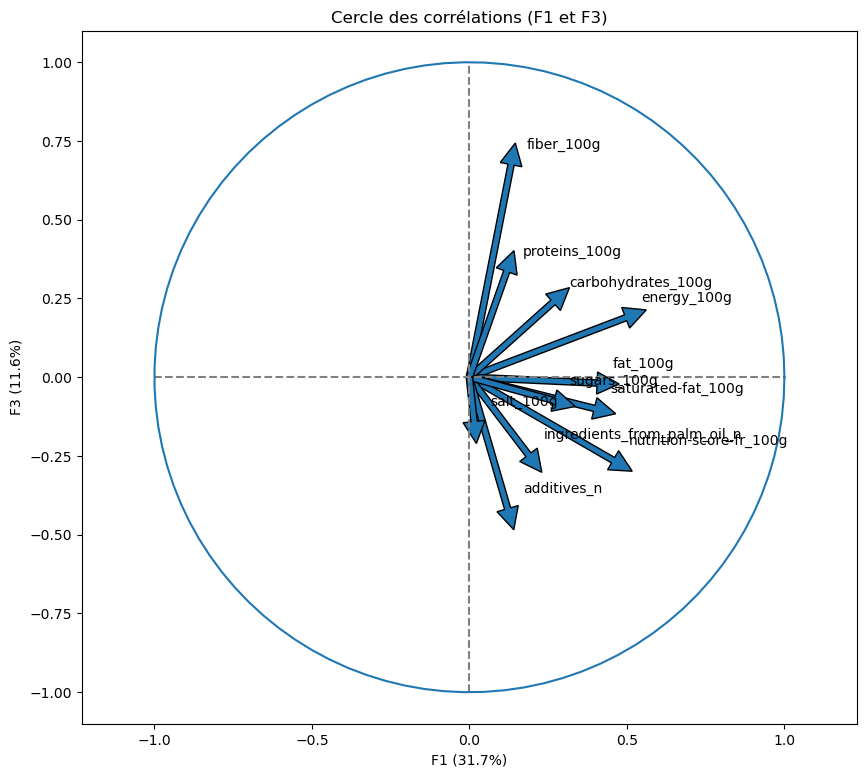

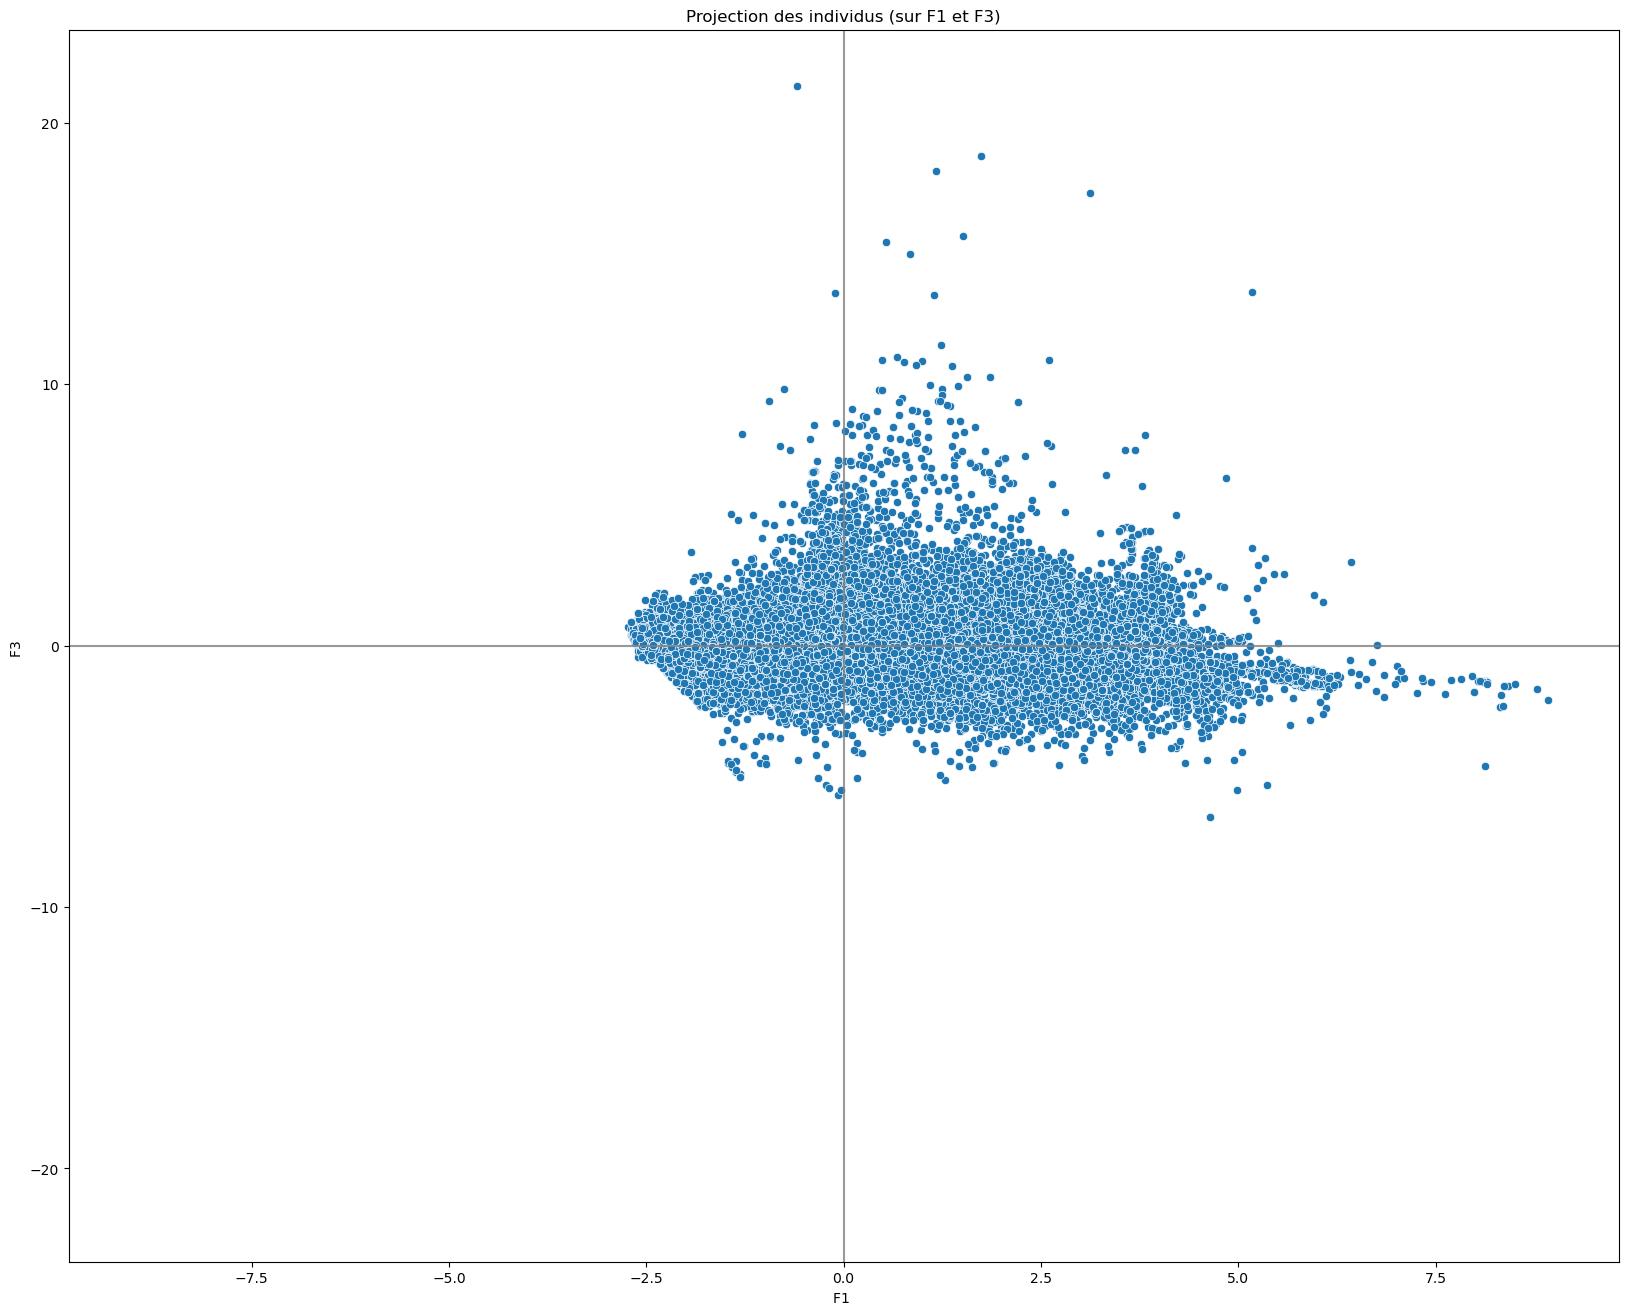

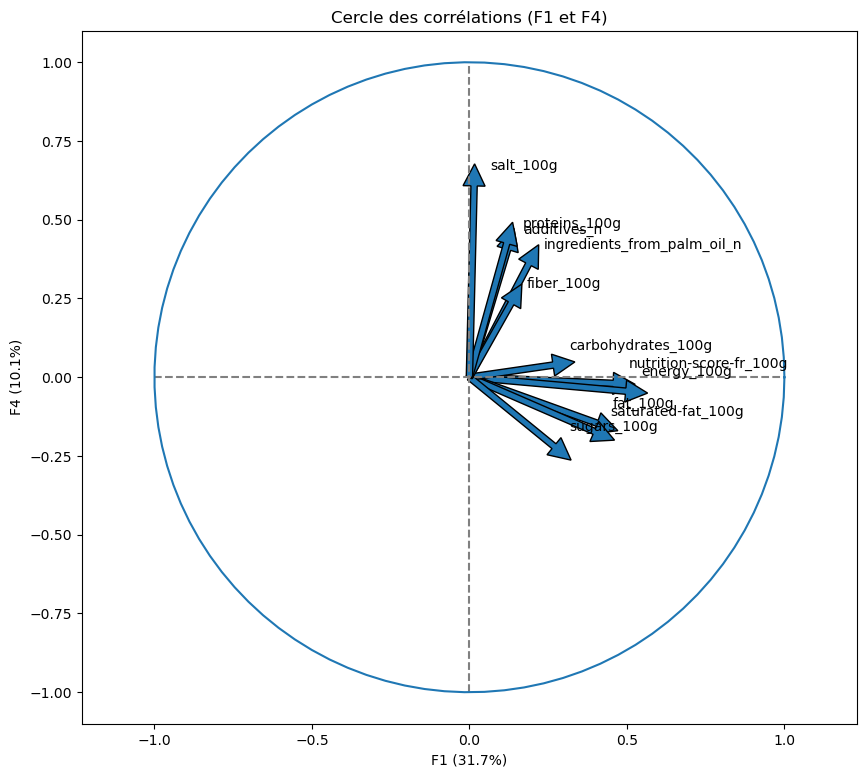

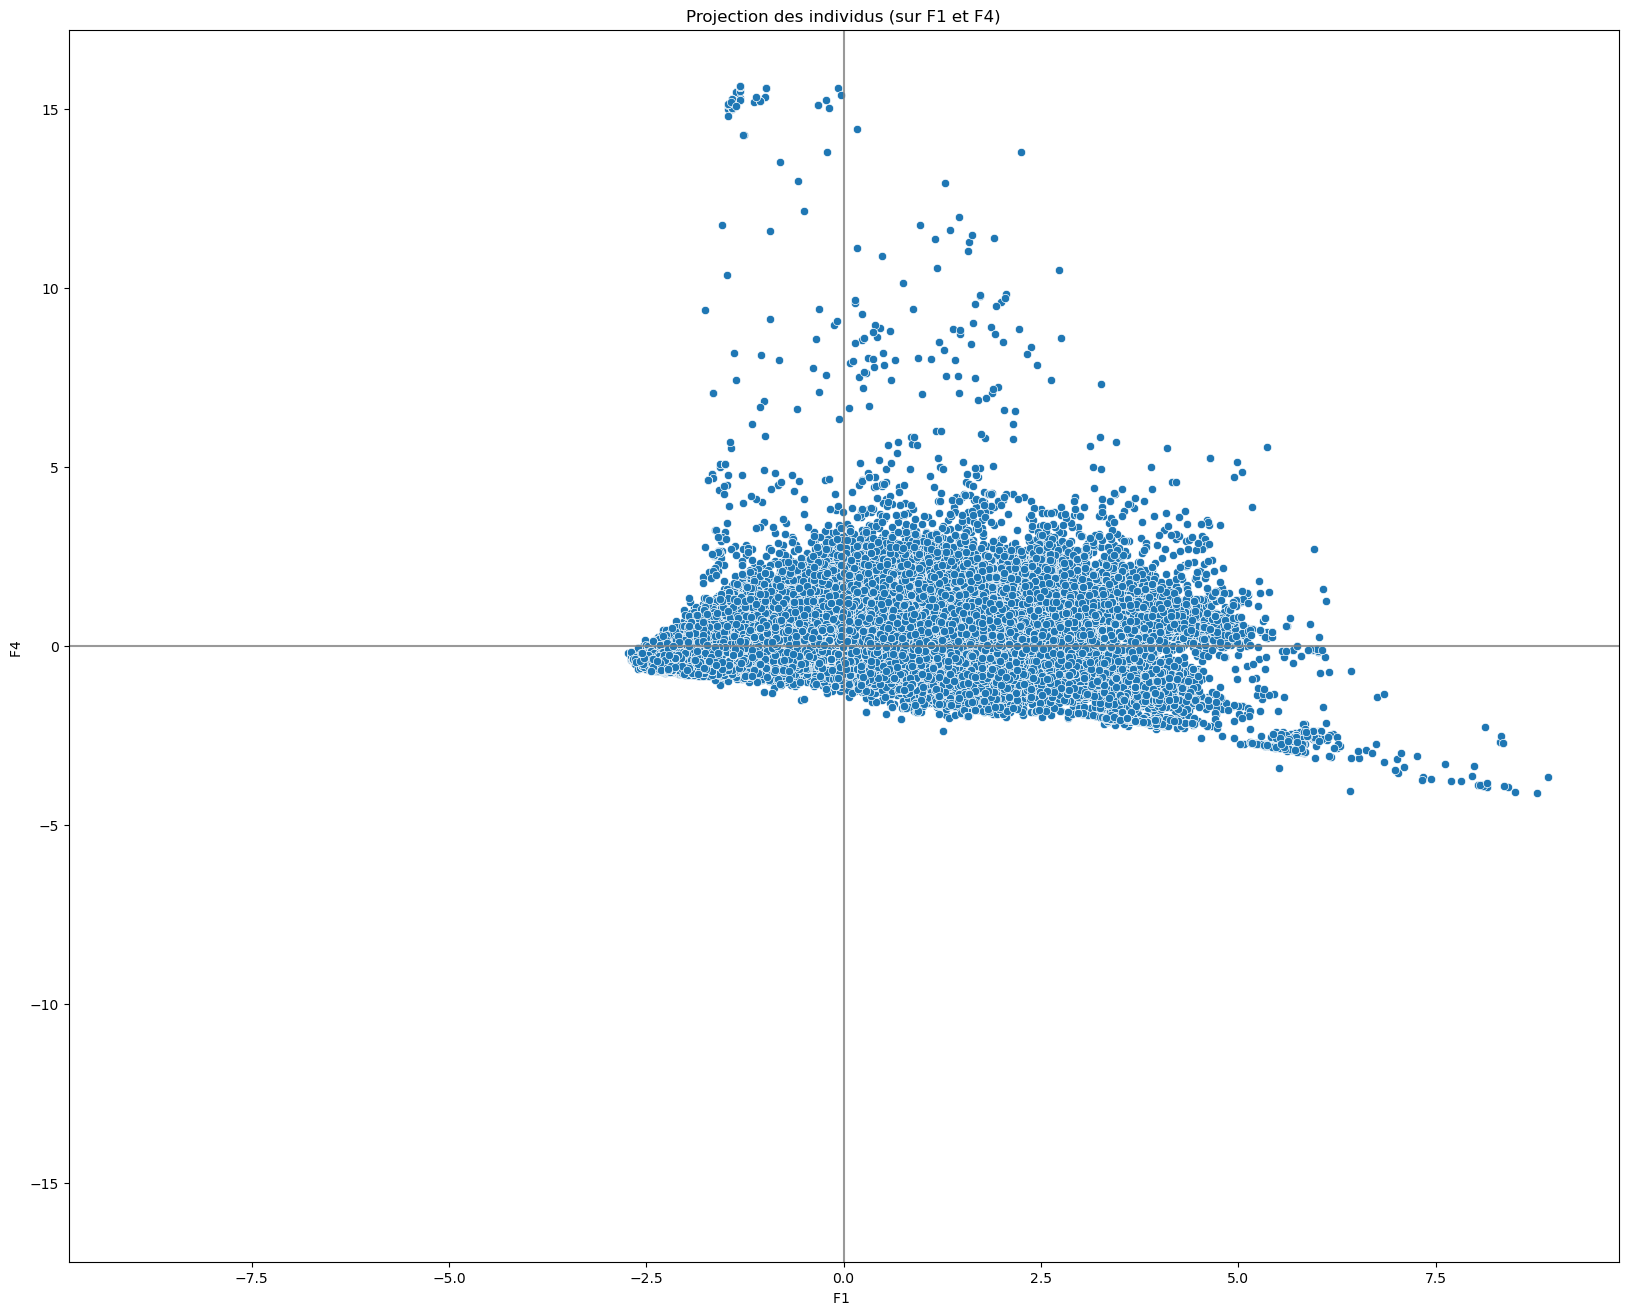

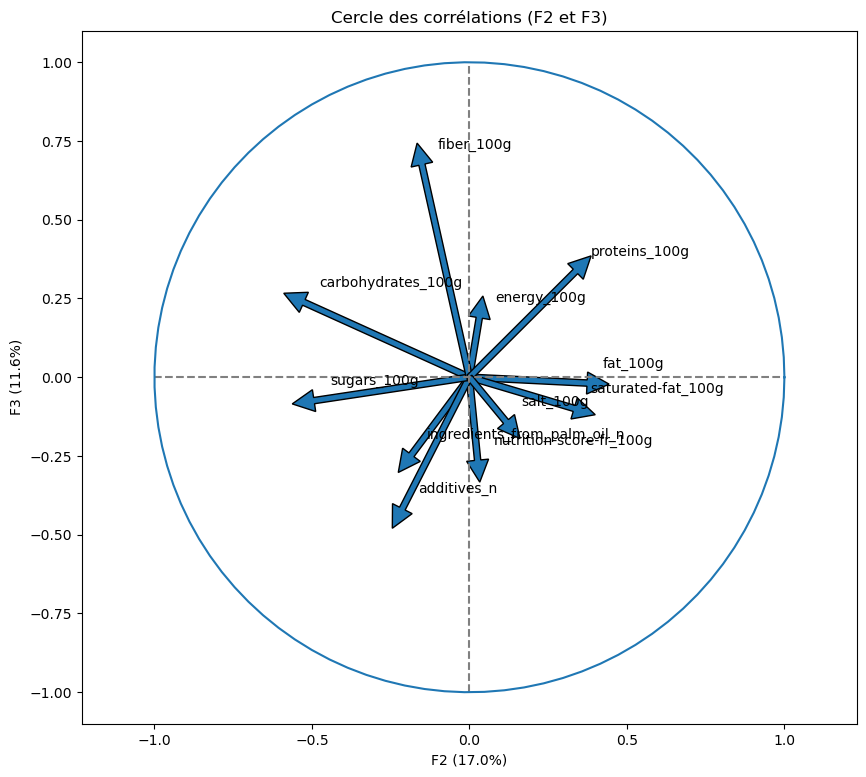

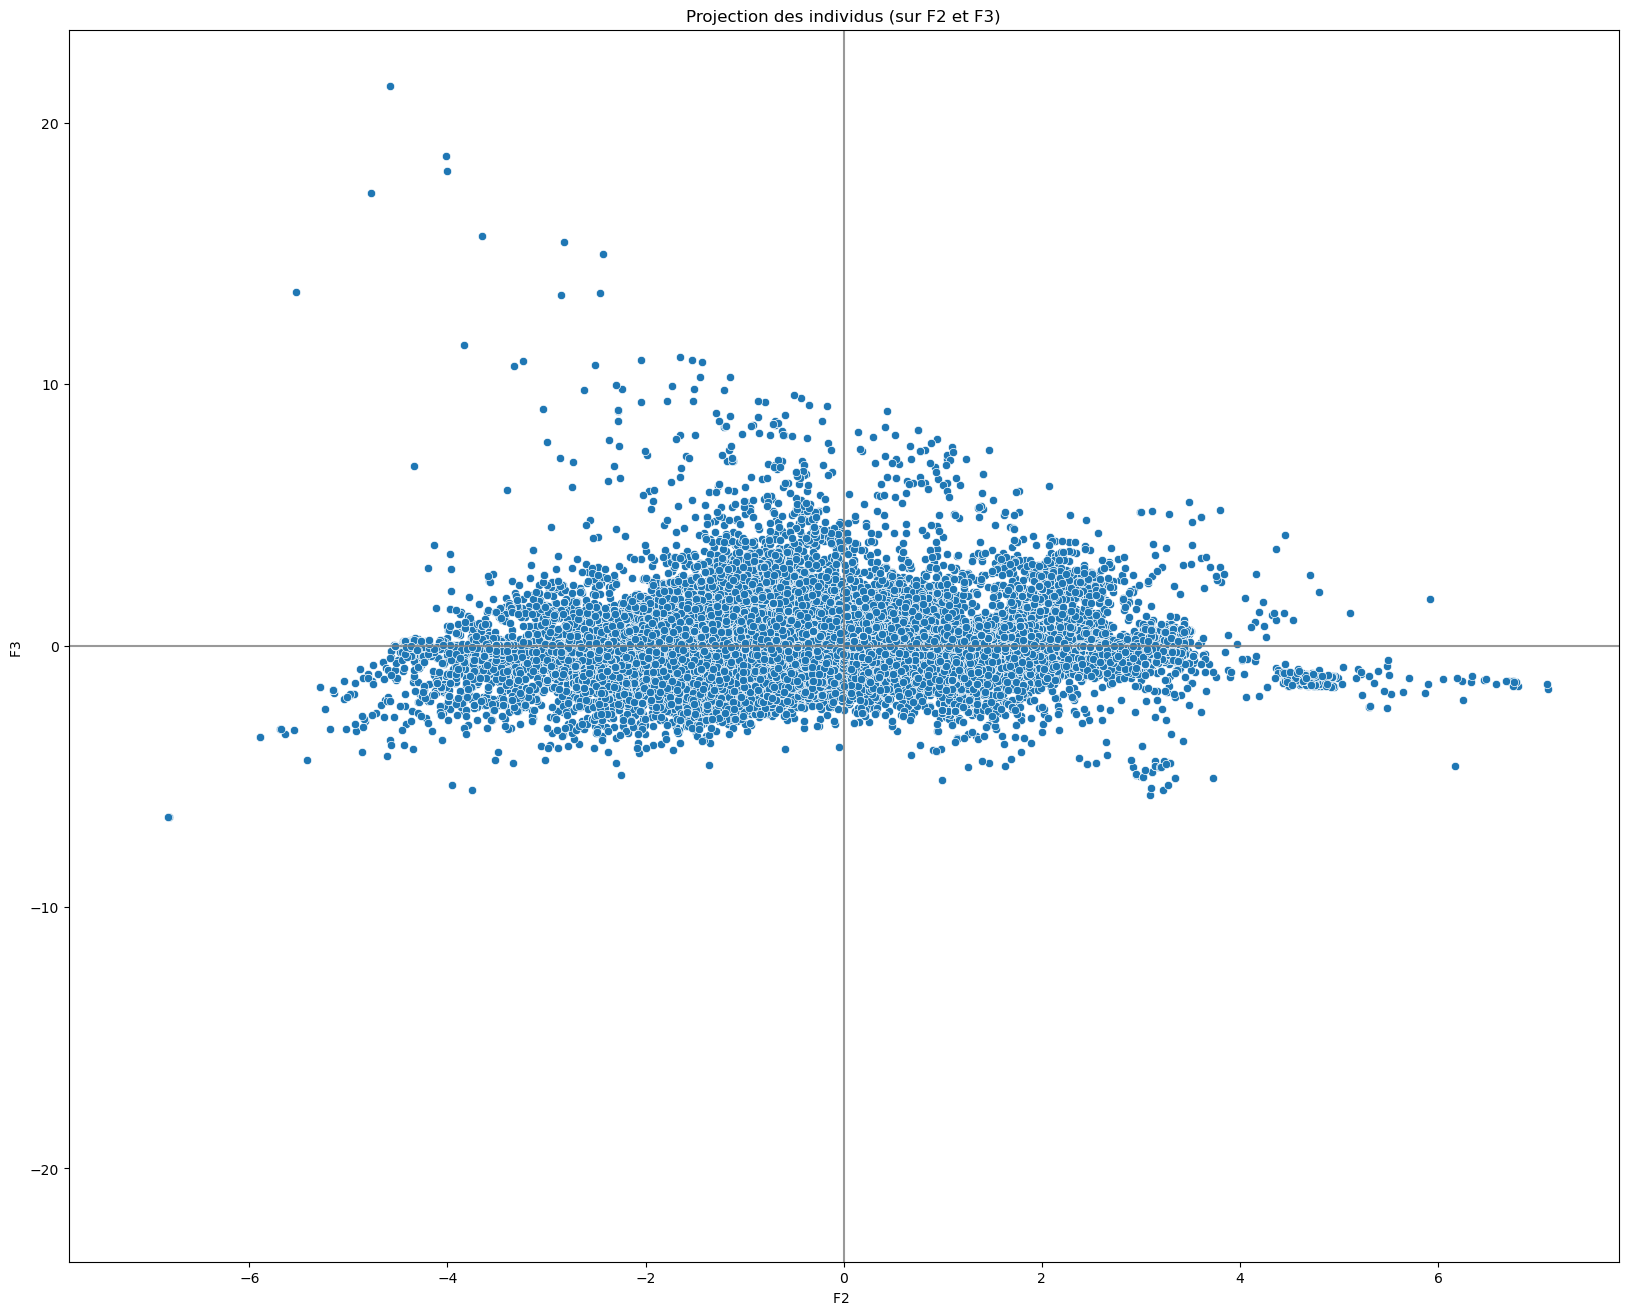

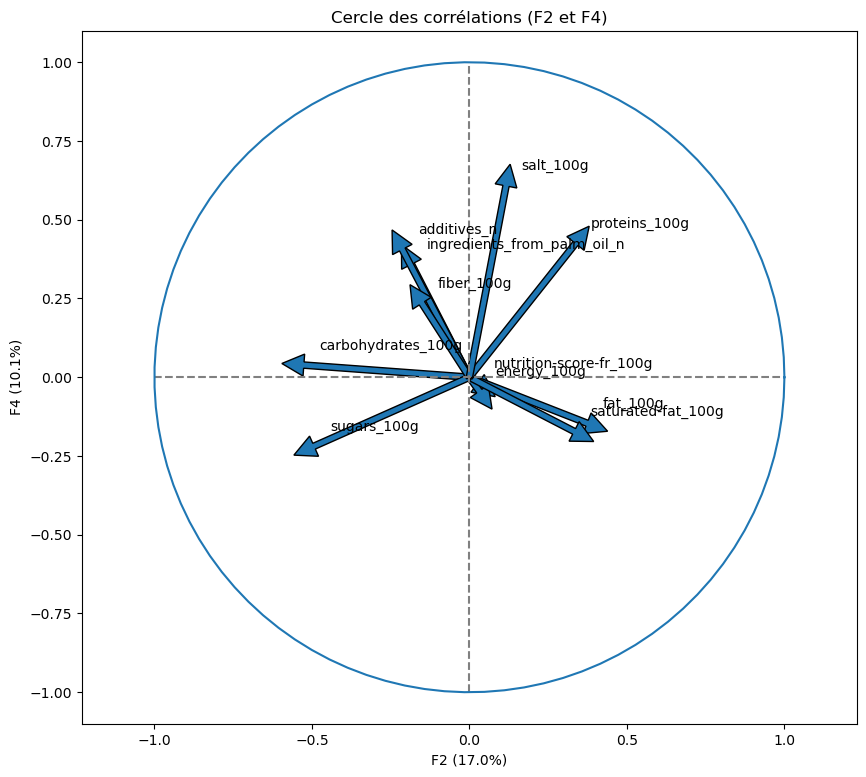

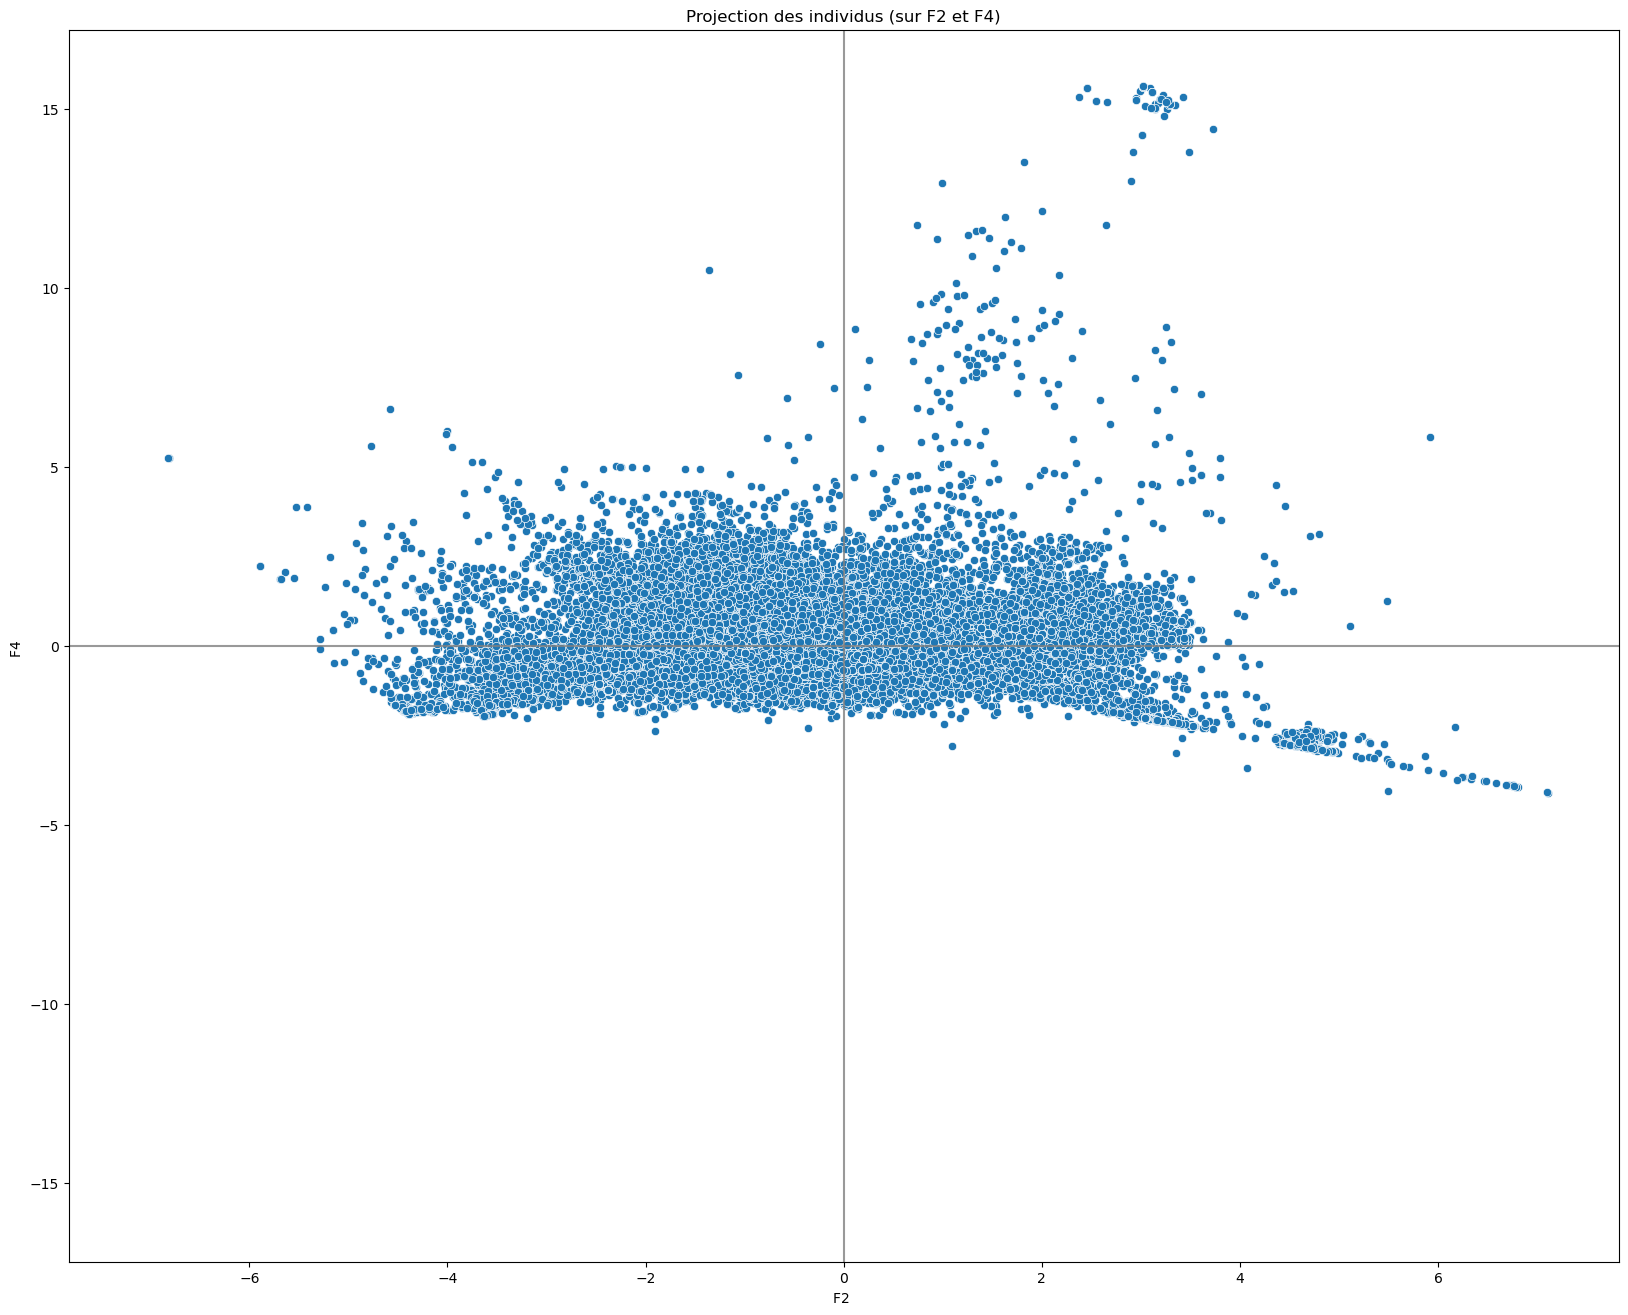

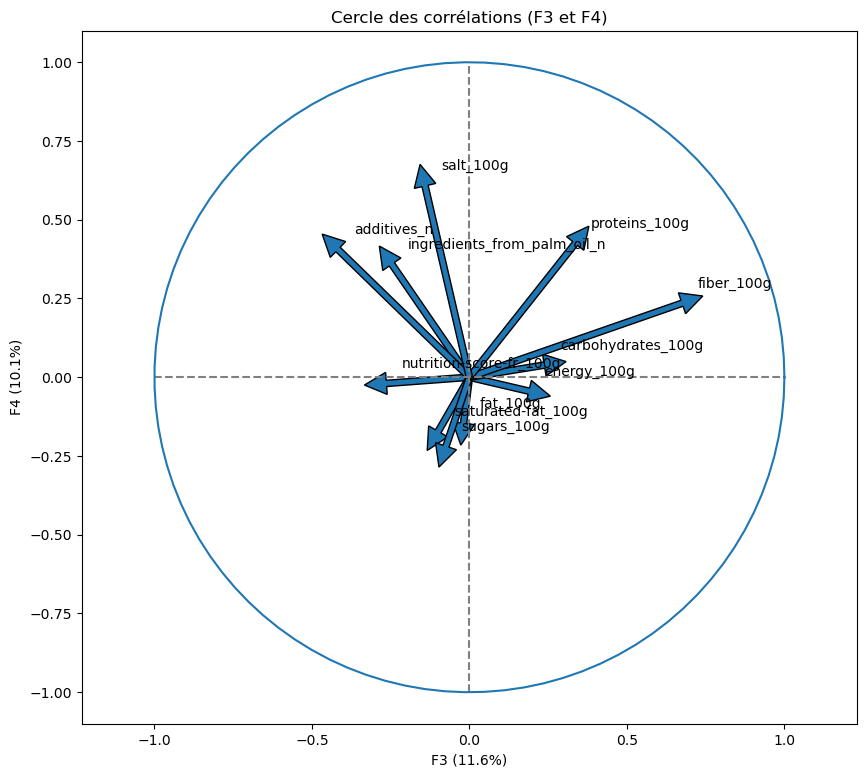

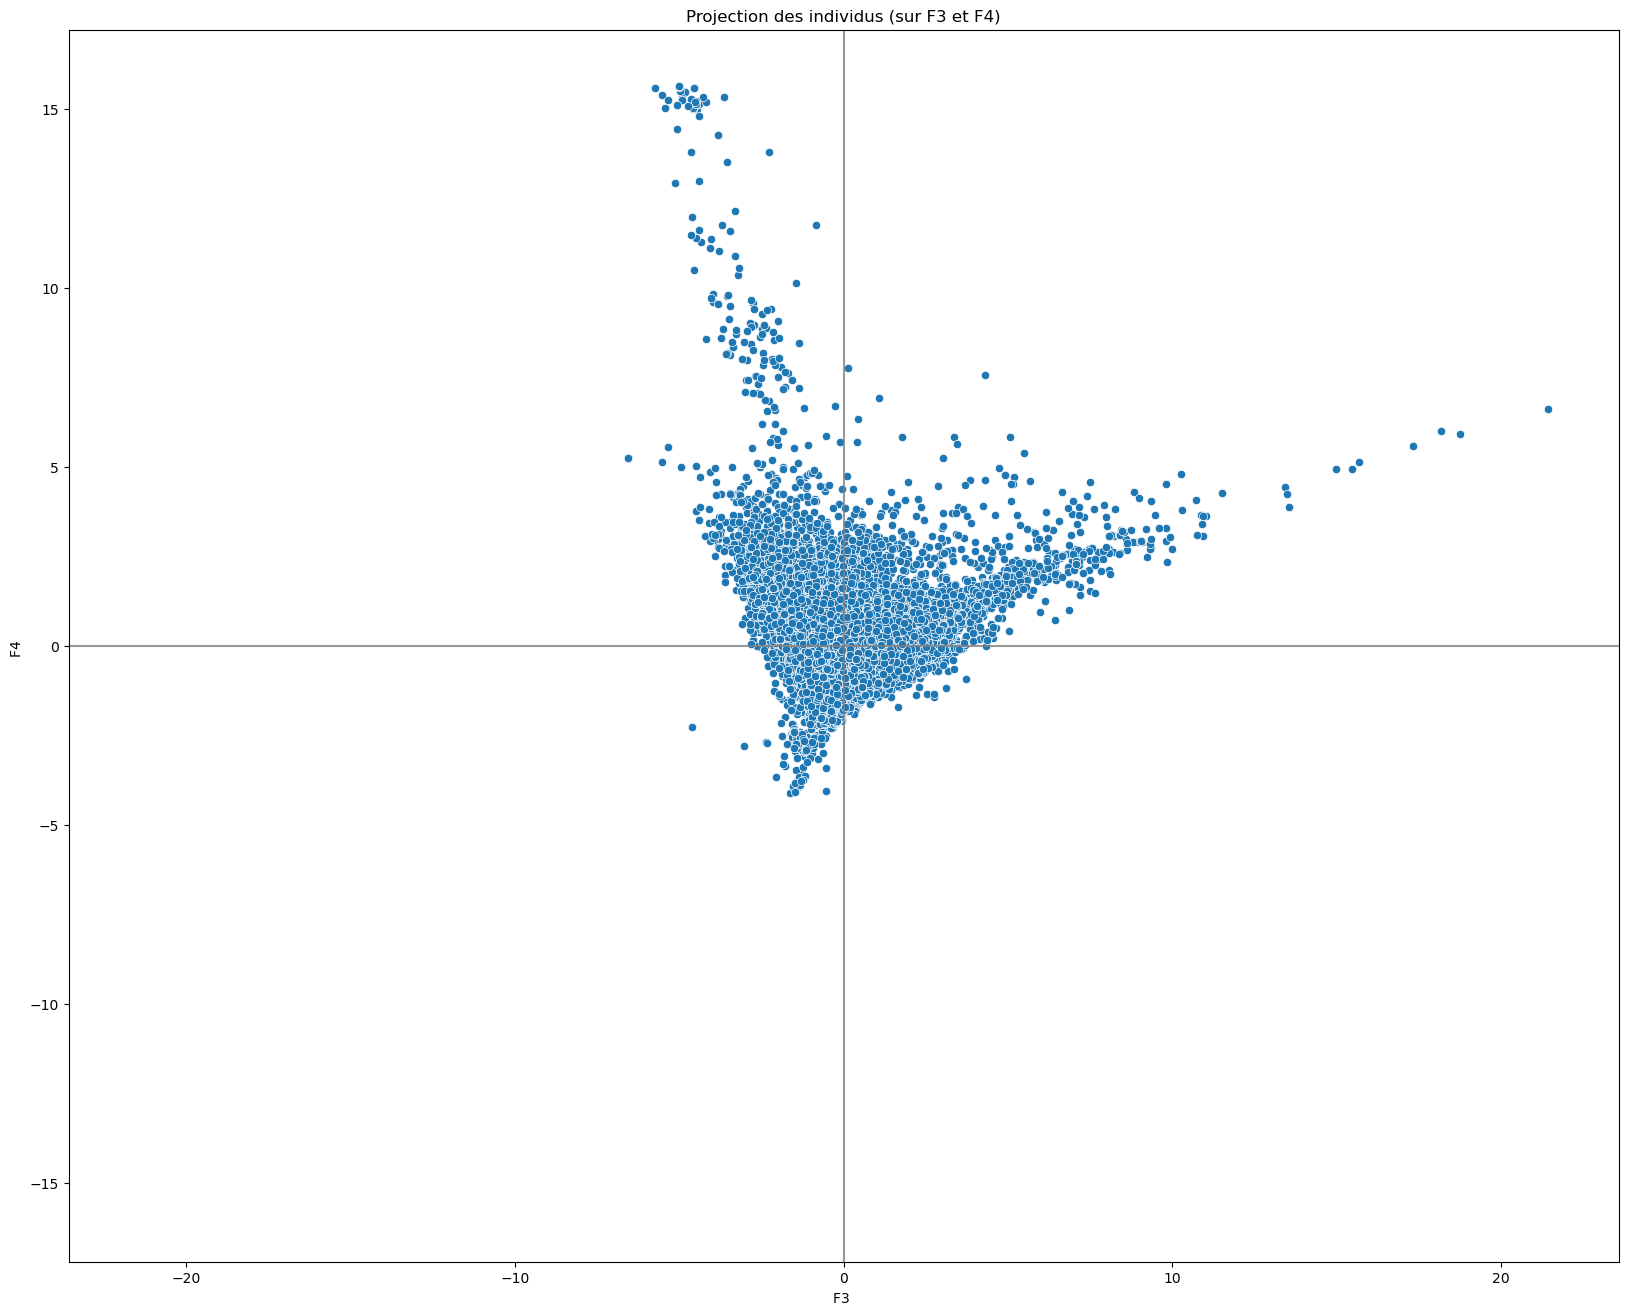

In [35]:
for x in range(4) : 
        for y in range(4) : 
            if x < y:
                x_y = (x,y)
                correlation_graph(pca, x_y, features)
                display_factorial_planes(X_proj, x_y, figsize=(20,16))
            


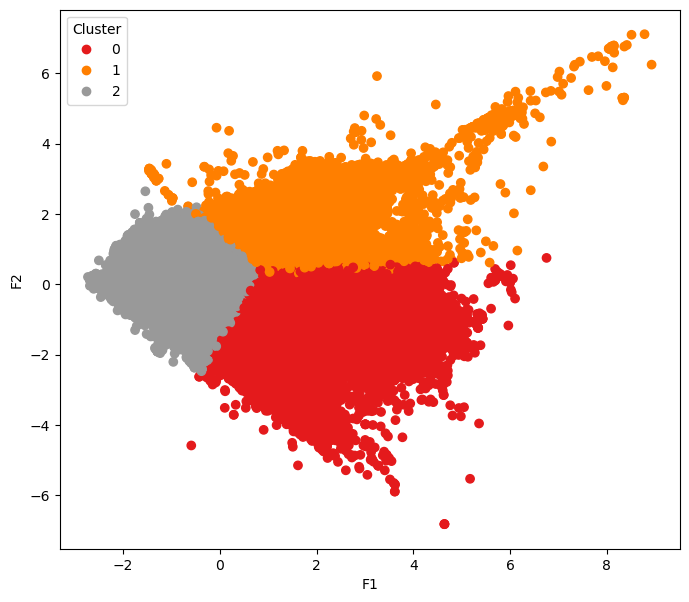

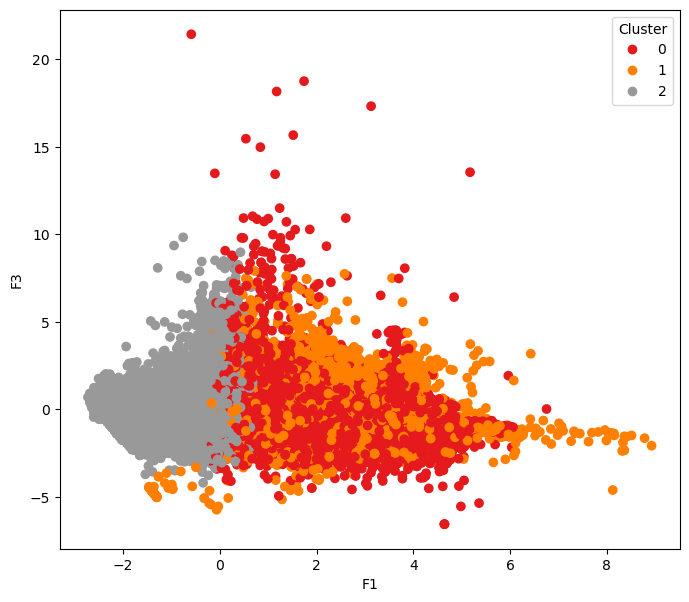

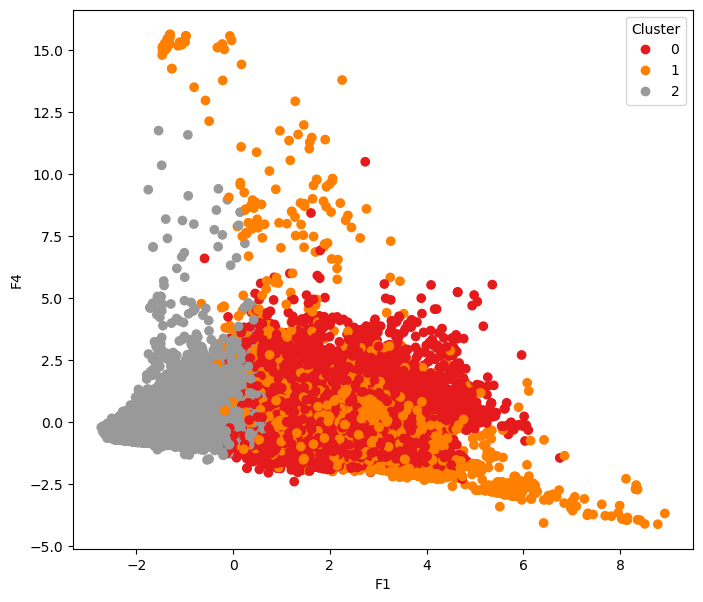

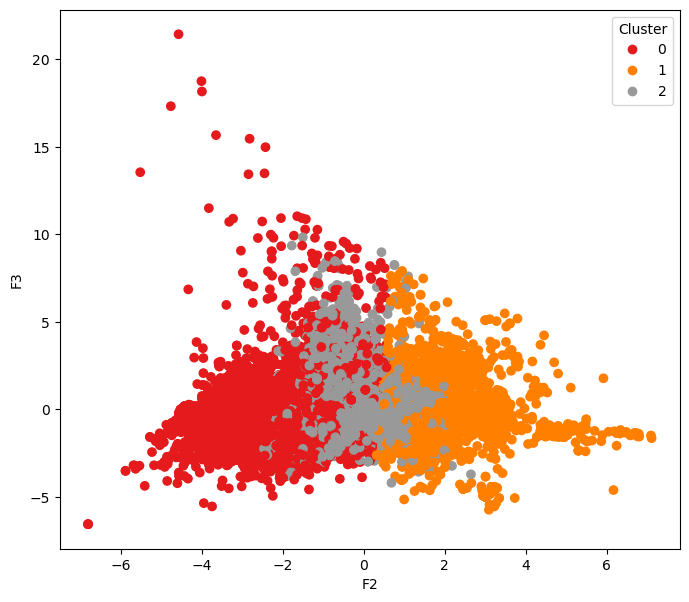

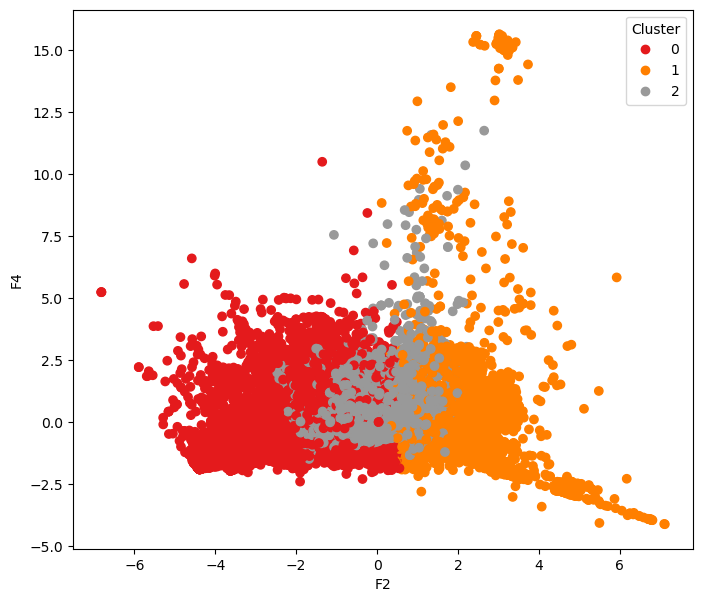

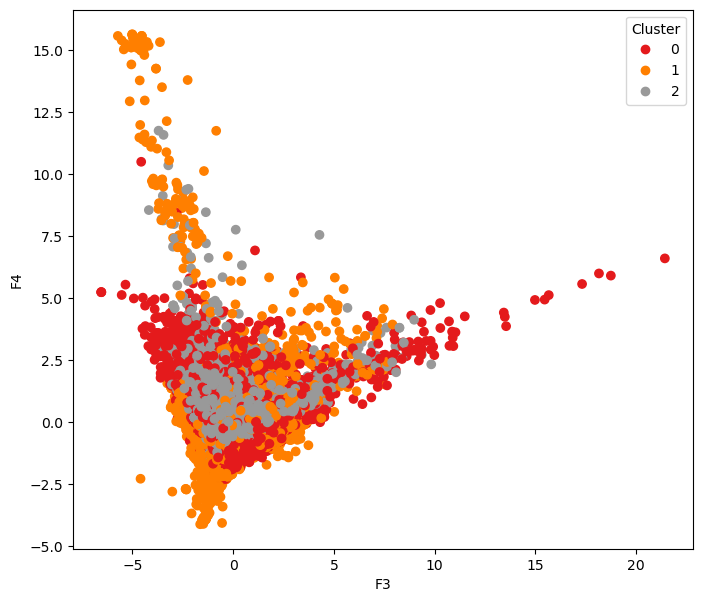

In [36]:
for x in range(4):
    for y in range(4):
        if x < y:
            X_proj = pca.transform(X_scaled)
            X_proj = pd.DataFrame(X_proj)
            fig, ax = plt.subplots(1,1, figsize=(8,7))
            scatter = ax.scatter(X_proj.iloc[:, x], X_proj.iloc[:, y], c=labels, cmap="Set1", label=labels)
            ax.set_xlabel("F"+str(x+1))
            ax.set_ylabel("F"+str(y+1))
            plt.legend(*scatter.legend_elements(), title="Cluster")            
            plt.show()


In [37]:
data_final = pd.concat([data,data_proj],axis=1)

### Le jeu de donnée final est prêt pour être exploité dans le cadre de l'application, dans le prochain notebook

In [38]:
data_final

product_name  \
0                         Lion Peanut x2   
1                         Pack de 2 Twix   
2                                  Flute   
3                      lentilles vertes    
4      Biscuits sablés fourrage au cacao   
...                                  ...   
62277                       Лимон — лайм   
62278          Roussette du Bugey (2011)   
62279                 Thé vert Earl grey   
62280                     Rillette d'oie   
62281                            乐吧泡菜味薯片   

                                               image_url  cluster_data  \
0      http://fr.openfoodfacts.org/images/products/00...             1   
1      http://fr.openfoodfacts.org/images/products/00...             2   
2      http://fr.openfoodfacts.org/images/products/00...             2   
3      http://fr.openfoodfacts.org/images/products/00...             2   
4      http://fr.openfoodfacts.org/images/products/00...             1   
...                                                  ...           ...   
62277  http://fr.openfoodfacts.org/images/products/99...             0   
62278  http://fr.openfoodfacts.org/images/products/99...             0   
62279  http://fr.openfoodfacts.org/images/products/99...             0   
62280  http://fr.openfoodfacts.org/images/products/99...             2   
62281  http://fr.openfoodfacts.org/images/products/99...             1   

      nutrition_grade_fr  nutrition-score-fr_100g  \
0                      E                     22.0   
1                      C                      7.0   
2                      B                      2.0   
3                      B                      2.0   
4                      D                     16.0   
...                  ...                      ...   
62277                  B                      2.0   
62278                  B                     -0.0   
62279                  B                      2.0   
62280                  C                      8.0   
62281                  C                      7.0   

       ingredients_from_palm_oil_n  additives_n  energy_100g  fat_100g  \
0                         0.000000     1.000000       1883.0     20.00   
1                         0.137778     2.300291       1481.0      4.17   
2                         0.000000     0.000000       1278.0      4.50   
3                         0.000000     0.000000       1493.0      3.00   
4                         0.000000     3.000000       1942.0     21.00   
...                            ...          ...          ...       ...   
62277                     0.000000     1.000000        276.0      0.20   
62278                     0.000000     0.000000        180.5      0.00   
62279                     0.000000     0.000000         21.0      0.20   
62280                     0.000000     0.000000       1013.0     17.00   
62281                     0.000000     1.000000       2120.0     27.60   

       saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0                   12.50               70.00       57.500        2.50   
1                    3.78               77.08       25.220        6.20   
2                    0.60               52.00        4.625        4.40   
3                    0.60               64.00        3.500        4.09   
4                    9.80               62.00       31.000        2.60   
...                   ...                 ...          ...         ...   
62277                0.04               14.50       13.700        1.70   
62278                0.00                3.00        0.550        0.00   
62279                0.20                0.50        0.500        0.20   
62280                6.30                1.00        0.800        0.50   
62281                3.10               53.90        2.300        4.00   

       proteins_100g  salt_100g  cluster_proj  sucrerie ?  animal ?  \
0               2.50    0.09652             0    2.921234 -1.681667   
1               6.25    0.44008             0    0.99

In [39]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62282 entries, 0 to 62281
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 62282 non-null  object 
 1   image_url                    62282 non-null  object 
 2   cluster_data                 62282 non-null  int32  
 3   nutrition_grade_fr           62282 non-null  object 
 4   nutrition-score-fr_100g      62282 non-null  float64
 5   ingredients_from_palm_oil_n  62282 non-null  float64
 6   additives_n                  62282 non-null  float64
 7   energy_100g                  62282 non-null  float64
 8   fat_100g                     62282 non-null  float64
 9   saturated-fat_100g           62282 non-null  float64
 10  carbohydrates_100g           62282 non-null  float64
 11  sugars_100g                  62282 non-null  float64
 12  fiber_100g                   62282 non-null  float64
 13  proteins_100g   

In [40]:
data_final.to_csv('data_final.csv') 